# Karol Kula projekt 1

# Zadanie 1
## import bibliotek, załadowanie danych.
Miasta na "K" nie było, więc wybrałem New Jersey

In [233]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
import ast
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("http://data.insideairbnb.com/united-states/nj/jersey-city/2023-09-18/data/listings.csv.gz")


# Zadanie 2 i Zadanie 3
## Wyświetlenie 5 przykładowych wierszy, w celu zorientowania się co sie tu dzieje

In [234]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,40669,https://www.airbnb.com/rooms/40669,20230918050414,2023-09-18,city scrape,Condo in Jersey City · ★5.0 · 1 bedroom · 1 be...,<b>The space</b><br />Skyy’s Lounge ....Everyt...,The neighborhood is very diverse & friendly sh...,https://a0.muscache.com/pictures/af7e4a45-0118...,175412,https://www.airbnb.com/users/show/175412,Skyy,2010-07-20,"Jersey City, NJ",I am the owner of a high end Nail Salon in the...,within a day,71%,60%,f,https://a0.muscache.com/im/users/175412/profil...,https://a0.muscache.com/im/users/175412/profil...,NaN,1,4,"['email', 'phone']",t,f,"Jersey City, New Jersey, United States",Ward C (councilmember Richard Boggiano),NaN,40.73724,-74.05310,Private room in condo,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Single level home"", ""Washer"", ""Fire extingui...",$128.00,3,365,3,3,365,365,3.0,365.0,NaN,t,5,27,57,57,2023-09-18,11,1,1,2010-09-23,2023-09-10,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,0,1,0,0.07
1,215768,https://www.airbnb.com/rooms/215768,20230918050414,2023-09-18,city scrape,Home in Jersey City · ★4.77 · 1 bedroom · 2 be...,Walking to distance to Statue of Liberty and E...,"Such close proximity to NYC, 7 minutes on the ...",https://a0.muscache.com/pictures/miso/Hosting-...,846837,https://www.airbnb.com/users/show/846837,Charlaine,2011-07-20,"Jersey City, NJ",Thank you for taking the time to learn a bit a...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,2,4,"['email', 'phone']",t,t,"Jersey City, New Jersey, United States",Ward F (councilmember Jermaine D. Robinson),NaN,40.71438,-74.05810,Entire home,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Coffee"", ""Washer"", ""Fire extinguisher"", ""Hos...",$139.00,5,1000,5,5,1000,1000,5.0,1000.0,NaN,t,6,19,35,285,2023-09-18,171,17,2,2011-09-13,2023-09-13,4.77,4.77,4.88,4.87,4.87,4.32,4.79,STR20-00055,f,2,2,0,0,1.17
2,254245,https://www.airbnb.com/rooms/254245,20230918050414,2023-09-18,city scrape,Home in Jersey City · ★4.76 · 1 bedroom · 1 be...,Walking to distance to Statue of Liberty and E...,"Such close proximity to NYC, 7 minutes on the ...",https://a0.muscache.com/pictures/miso/Hosting-...,846837,https://www.airbnb.com/users/show/846837,Charlaine,2011-07-20,"Jersey City, NJ",Thank you for taking the time to learn a bit a...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,2,4,"['email', 'phone']",t,t,"Jersey City, New Jersey, United States",Ward F (councilmember Jermaine D. Robinson),NaN,40.71162,-74.06179,Entire home,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Coffee"", ""Washer"", ""Fire extin

## Wyświetlenie wszystkich danych

In [235]:
pd.set_option('display.max_columns', None)
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,40669,https://www.airbnb.com/rooms/40669,20230918050414,2023-09-18,city scrape,Condo in Jersey City · ★5.0 · 1 bedroom · 1 be...,<b>The space</b><br />Skyy’s Lounge ....Everyt...,The neighborhood is very diverse & friendly sh...,https://a0.muscache.com/pictures/af7e4a45-0118...,175412,https://www.airbnb.com/users/show/175412,Skyy,2010-07-20,"Jersey City, NJ",I am the owner of a high end Nail Salon in the...,within a day,71%,60%,f,https://a0.muscache.com/im/users/175412/profil...,https://a0.muscache.com/im/users/175412/profil...,NaN,1,4,"['email', 'phone']",t,f,"Jersey City, New Jersey, United States",Ward C (councilmember Richard Boggiano),NaN,40.737240,-74.053100,Private room in condo,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Single level home"", ""Washer"", ""Fire extingui...",$128.00,3,365,3,3,365,365,3.0,365.0,NaN,t,5,27,57,57,2023-09-18,11,1,1,2010-09-23,2023-09-10,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,0,1,0,0.07
1,215768,https://www.airbnb.com/rooms/215768,20230918050414,2023-09-18,city scrape,Home in Jersey City · ★4.77 · 1 bedroom · 2 be...,Walking to distance to Statue of Liberty and E...,"Such close proximity to NYC, 7 minutes on the ...",https://a0.muscache.com/pictures/miso/Hosting-...,846837,https://www.airbnb.com/users/show/846837,Charlaine,2011-07-20,"Jersey City, NJ",Thank you for taking the time to learn a bit a...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,2,4,"['email', 'phone']",t,t,"Jersey City, New Jersey, United States",Ward F (councilmember Jermaine D. Robinson),NaN,40.714380,-74.058100,Entire home,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Coffee"", ""Washer"", ""Fire extinguisher"", ""Hos...",$139.00,5,1000,5,5,1000,1000,5.0,1000.0,NaN,t,6,19,35,285,2023-09-18,171,17,2,2011-09-13,2023-09-13,4.77,4.77,4.88,4.87,4.87,4.32,4.79,STR20-00055,f,2,2,0,0,1.17
2,254245,https://www.airbnb.com/rooms/254245,20230918050414,2023-09-18,city scrape,Home in Jersey City · ★4.76 · 1 bedroom · 1 be...,Walking to distance to Statue of Liberty and E...,"Such close proximity to NYC, 7 minutes on the ...",https://a0.muscache.com/pictures/miso/Hosting-...,846837,https://www.airbnb.com/users/show/846837,Charlaine,2011-07-20,"Jersey City, NJ",Thank you for taking the time to learn a bit a...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,2,4,"['email', 'phone']",t,t,"Jersey City, New Jersey, United States",Ward F (councilmember Jermaine D. Robinson),NaN,40.711620,-74.061790,Entire home,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Coffee"", ""Washer"", ""Fire

## Wyswietlenie informacji o typach kolumn

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1324 non-null   int64  
 1   listing_url                                   1324 non-null   object 
 2   scrape_id                                     1324 non-null   int64  
 3   last_scraped                                  1324 non-null   object 
 4   source                                        1324 non-null   object 
 5   name                                          1324 non-null   object 
 6   description                                   1317 non-null   object 
 7   neighborhood_overview                         819 non-null    object 
 8   picture_url                                   1324 non-null   object 
 9   host_id                                       1324 non-null   i

## Wyświetlenie rozmiaru zbioru danych

In [237]:
data.shape

(1324, 75)

## Wyświetlenie samych typów kolumn

In [238]:
data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

Mamy 75 kolumn i 1324 wiersze, wiekszość danych jest typu object więc będzie konieczna zamiana na konktretny odpowiedni typ. Po wstępnym przeglądzie danych widać że niektóre kolumny są puste więc być może muszą zostać usunięte ponieważ nic nie wniosą do analizy, Obróbka danyhc nie powinna zająć dużo czasu

# Zadanie 4
## Zamiana typów i weryfikacja
Teraz przeprowadze analize wszystkich kolumn i gdzie trzeba to zamienie na odpowiednie typy

In [239]:
data.iloc[:, :5]

,id,listing_url,scrape_id,last_scraped,source
0,40669,https://www.airbnb.com/rooms/40669,20230918050414,2023-09-18,city scrape
1,215768,https://www.airbnb.com/rooms/215768,20230918050414,2023-09-18,city scrape
2,254245,https://www.airbnb.com/rooms/254245,20230918050414,2023-09-18,city scrape
3,269266,https://www.airbnb.com/rooms/269266,20230918050414,2023-09-18,city scrape
4,270245,https://www.airbnb.com/rooms/270245,20230918050414,2023-09-18,city scrape
...,...,...,...,...,...
1319,980482250747395799,https://www.airbnb.com/rooms/980482250747395799,20230918050414,2023-09-18,city scrape
1320,981050569727129557,https://www.airbnb.com/rooms/981050569727129557,20230918050414,2023-09-18,city scrape
1321,981716811722485393,https://www.airbnb.com/rooms/981716811722485393,20230918050414,2023-09-18,city scrape
1322,981829528456499146,https://www.airbnb.com/rooms/981829528456499146,20230918050414,2023-09-18,city scrape


In [240]:
data['id'].duplicated().any()
data['source'].value_counts()

source
city scrape        1291
previous scrape      33
Name: count, dtype: int64

## Kolumny 0-5
typ int64 to dobry typ dla kolumny id, każde id jest unikalne
scrape_id - dobry typ
last_scraped - moża zmienić na date
source - można zmienić na kategorie


In [241]:
data['last_scraped'] = pd.to_datetime(data['last_scraped'])
data['source'] = data['source'].astype('category')

In [242]:
data.iloc[:, 5:10]

,name,description,neighborhood_overview,picture_url,host_id
0,Condo in Jersey City · ★5.0 · 1 bedroom · 1 be...,<b>The space</b><br />Skyy’s Lounge ....Everyt...,The neighborhood is very diverse & friendly sh...,https://a0.muscache.com/pictures/af7e4a45-0118...,175412
1,Home in Jersey City · ★4.77 · 1 bedroom · 2 be...,Walking to distance to Statue of Liberty and E...,"Such close proximity to NYC, 7 minutes on the ...",https://a0.muscache.com/pictures/miso/Hosting-...,846837
2,Home in Jersey City · ★4.76 · 1 bedroom · 1 be...,Walking to distance to Statue of Liberty and E...,"Such close proximity to NYC, 7 minutes on the ...",https://a0.muscache.com/pictures/miso/Hosting-...,846837
3,Rental unit in Jersey City · ★4.36 · 2 bedroom...,Enjoy that private luxury two bedrooms apartme...,Our House is located in the Liberty State Park...,https://a0.muscache.com/pictures/miso/Hosting-...,1410590
4,Townhouse in Jersey City · ★4.55 · 1 bedroom ·...,Just for you small bedroom with private bathro...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1410590
...,...,...,...,...,...
1319,Rental unit in Jersey City · ★New · 1 bedroom ...,"Safe location, charming place , 2-3 min walkin...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,536701303
1320,Rental unit in Jersey City · ★New · 1 bedroom ...,Welcome to our inviting shared bedroom at Jers...,"Our apartment is strategically located, making...",https://a0.muscache.com/pictures/miso/Hosting-...,513781380
1321,Rental unit in Jersey City · ★New · 1 bedroom ...,This unique place has a style all its own.,NaN,https://a0.muscache.com/pictures/75b1cfdc-3b1d...,98240103
1322,Home in Bayonne · ★New · 1 bedroom · 1 bed · 1...,"The room has an excellent location, it is a qu...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,333174348


# Kolumny 5-10
Wygląda na to że kolumny od name do host_id mają odpowiedni typ

In [243]:
data.iloc[:, 10:15]

,host_url,host_name,host_since,host_location,host_about
0,https://www.airbnb.com/users/show/175412,Skyy,2010-07-20,"Jersey City, NJ",I am the owner of a high end Nail Salon in the...
1,https://www.airbnb.com/users/show/846837,Charlaine,2011-07-20,"Jersey City, NJ",Thank you for taking the time to learn a bit a...
2,https://www.airbnb.com/users/show/846837,Charlaine,2011-07-20,"Jersey City, NJ",Thank you for taking the time to learn a bit a...
3,https://www.airbnb.com/users/show/1410590,Magda,2011-11-15,"Jersey City, NJ",I am living in New York City area for several...
4,https://www.airbnb.com/users/show/1410590,Magda,2011-11-15,"Jersey City, NJ",I am living in New York City area for several...
...,...,...,...,...,...
1319,https://www.airbnb.com/users/show/536701303,Fares,2023-09-11,NaN,NaN
1320,https://www.airbnb.com/users/show/513781380,Jc,2023-05-08,"Jersey City, NJ",JC Livin is a small business that specializes ...
1321,https://www.airbnb.com/users/show/98240103,Julio,2016-10-05,"Jersey City, NJ",My Name is Julio Gallardo and I am married to ...
1322,https://www.airbnb.com/users/show/333174348,Winston,2020-02-03,NaN,NaN


In [244]:
data['host_location'].value_counts()

host_location
Jersey City, NJ              541
New York, NY                 273
Hawthorne, NJ                 39
Ridgewood, NJ                 35
New Jersey, United States     27
New York, United States       25
Weehawken, NJ                 10
Hoboken, NJ                   10
United States                  8
Los Angeles, CA                6
Edison, NJ                     5
Medellín, Colombia             5
West New York, NJ              4
Carlstadt, NJ                  4
Wayne, NJ                      4
Chicago, IL                    4
Ridgefield Park, NJ            2
Bayonne, NJ                    2
Harrison, NJ                   2
Keene Valley, NY               2
Las Vegas, NV                  2
Lackawaxen, PA                 2
Elizabeth, NJ                  2
Charlotte, NC                  1
Panama                         1
East Orange, NJ                1
Heidelberg, Germany            1
London, United Kingdom         1
Watertown, NY                  1
Holmdel, NJ                  

In [245]:
data['host_location'].value_counts().count()

56

# Kolumny 10-15
host_url, host_name, host_about - ok
host_since - zamiana na date
host_location - ok


In [246]:
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')
data['host_location'] = data['host_location'].astype('string')

In [247]:
data.iloc[:, 15:20]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url
0,within a day,71%,60%,f,https://a0.muscache.com/im/users/175412/profil...
1,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/User-...
2,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/User-...
3,within an hour,100%,100%,f,https://a0.muscache.com/im/users/1410590/profi...
4,within an hour,100%,100%,f,https://a0.muscache.com/im/users/1410590/profi...
...,...,...,...,...,...
1319,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/User-...
1320,within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/User-...
1321,within an hour,100%,99%,f,https://a0.muscache.com/im/pictures/user/1918a...
1322,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/ce737...


In [248]:
data['host_response_time'].value_counts()

host_response_time
within an hour        1014
within a few hours     134
within a day            91
a few days or more      52
Name: count, dtype: int64

In [249]:
data['host_is_superhost'].value_counts()

host_is_superhost
f    920
t    384
Name: count, dtype: int64

In [250]:
data['host_acceptance_rate'].str.contains('%').all()

True

In [251]:
data['host_response_rate'].str.contains('%').all()

True

# Kolumny 15-20
host_response_time - tylko cztery wartości więc odpowiedni typ będzie kategoryczny
host_response_rate, host_acceptance_rate wartości podane w procentach, podzielenie na sto i zmiana na typ float
host_is_superhost - zawiera tylko wartości true i false  więc zamieniam na typ bool
host_thumbnail_url - kolejny url ok

In [252]:
data['host_response_time'] = data['host_response_time'].astype('category')
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype('float') / 100
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.rstrip('%').astype('float') / 100
data['host_is_superhost'] = data['host_is_superhost'].replace({'t': True, 'f': False}).astype(bool)

In [253]:
data.iloc[:, 20:25]

,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications
0,https://a0.muscache.com/im/users/175412/profil...,NaN,1,4,"['email', 'phone']"
1,https://a0.muscache.com/im/pictures/user/User-...,NaN,2,4,"['email', 'phone']"
2,https://a0.muscache.com/im/pictures/user/User-...,NaN,2,4,"['email', 'phone']"
3,https://a0.muscache.com/im/users/1410590/profi...,Bergen-Lafayette,11,18,"['email', 'phone']"
4,https://a0.muscache.com/im/users/1410590/profi...,Bergen-Lafayette,11,18,"['email', 'phone']"
...,...,...,...,...,...
1319,https://a0.muscache.com/im/pictures/user/User-...,Downtown Jersey City,1,2,['phone']
1320,https://a0.muscache.com/im/pictures/user/User-...,Bergen-Lafayette,5,5,"['email', 'phone']"
1321,https://a0.muscache.com/im/pictures/user/1918a...,The Heights,22,32,"['email', 'phone']"
1322,https://a0.muscache.com/im/pictures/user/ce737...,Greenville,5,6,['phone']


In [254]:
data['host_neighbourhood'].unique()

array([nan, 'Bergen-Lafayette', 'McGinley Square', 'Cambridge',
       'The Village', 'The Heights', 'Journal Square',
       'Downtown Jersey City', 'Greenville', 'Upper East Side',
       "Hell's Kitchen", 'Zona Romántica', 'Aventura', 'Marina',
       'West Side', 'Riverside', 'Hamilton Park', 'Hudson Exchange',
       'Iselin', 'Hackensack River Waterfront', 'Bedford-Stuyvesant',
       'Market East', 'South Broad Street', 'Constable Hook', 'Weequahic',
       'Powerhouse Arts District', 'Highland Lakes',
       'Hollywood South Central Beach', 'Flushing', 'Central LA',
       'Vegas de La Doctora', 'Long Island City', 'Newport', 'Koreatown',
       'East Colorado Springs', 'Forest Hills', 'Astoria', 'Chelsea',
       'North Riverdale', 'West Brighton', 'Edgewater', 'Downtown Miami',
       'Potomac Yard', 'Camelback East Village'], dtype=object)

In [255]:
data['host_verifications'].value_counts()

host_verifications
['email', 'phone']                  912
['email', 'phone', 'work_email']    242
['phone']                           165
['phone', 'work_email']               4
['email']                             1
Name: count, dtype: int64

In [256]:
def parse_list(verification_string):
    try:
        verification_list = ast.literal_eval(verification_string)
        if isinstance(verification_list, list):
            return verification_list
        else:
            return []

    except (ValueError, SyntaxError):
        return []

host_verifications_list = data['host_verifications'].apply(parse_list)

In [257]:
host_verifications_list

0       [email, phone]
1       [email, phone]
2       [email, phone]
3       [email, phone]
4       [email, phone]
             ...      
1319           [phone]
1320    [email, phone]
1321    [email, phone]
1322           [phone]
1323           [phone]
Name: host_verifications, Length: 1324, dtype: object

# Kolumny 20-25
host_picture_url, host_picture_url - ok
host_listings_count, host_total_listings_count mają odpowiednie typy
host_verifications kolumna ta posiada liste, 3 wartości można to zamienić procesem One-hot encoding na osobne kolumny  tak aby każda wartości była oznaczona 1 lub 0 a kolumne host_verification można usunąć

In [258]:
mlb = MultiLabelBinarizer()

one_hot_encoded_verifications = mlb.fit_transform(host_verifications_list)
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_verifications, columns=mlb.classes_)
one_hot_encoded_df.head()

data_with_one_hot = data.join(one_hot_encoded_df)

one_hot_encoded_verifications = mlb.fit_transform(host_verifications_list)
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_verifications, columns=mlb.classes_)

data = pd.concat([data, one_hot_encoded_df], axis=1)
data.drop('host_verifications', axis=1, inplace=True)

In [259]:
data[['email', 'phone', 'work_email']]

,email,phone,work_email
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
1319,0,1,0
1320,1,1,0
1321,1,1,0
1322,0,1,0


In [260]:
data.iloc[:, 24:30]

,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude
0,t,f,"Jersey City, New Jersey, United States",Ward C (councilmember Richard Boggiano),NaN,40.737240
1,t,t,"Jersey City, New Jersey, United States",Ward F (councilmember Jermaine D. Robinson),NaN,40.714380
2,t,t,"Jersey City, New Jersey, United States",Ward F (councilmember Jermaine D. Robinson),NaN,40.711620
3,t,f,"Jersey City, New Jersey, United States",Ward F (councilmember Jermaine D. Robinson),NaN,40.711350
4,t,f,NaN,Ward F (councilmember Jermaine D. Robinson),NaN,40.713400
...,...,...,...,...,...,...
1319,t,t,NaN,Ward E (councilmember James Solomon),NaN,40.719732
1320,t,t,"Jersey City, New Jersey, United States",Ward F (councilmember Jermaine D. Robinson),NaN,40.705539
1321,t,t,NaN,Ward A (councilmember Denise Ridley),NaN,40.688882
1322,t,t,NaN,Ward A (councilmember Denise Ridley),NaN,40.687234


In [261]:
data['host_has_profile_pic'].value_counts()

host_has_profile_pic
t    1291
f      33
Name: count, dtype: int64

In [262]:
data['host_identity_verified'].value_counts()

host_identity_verified
t    1200
f     124
Name: count, dtype: int64

In [263]:
data['neighbourhood'].value_counts()
#można wartością najcześciej występująca uzupełnić

neighbourhood
Jersey City, New Jersey, United States      815
North Bergen, New Jersey, United States       1
Hoboken, New Jersey, United States            1
Bayonne, New Jersey, United States            1
 jersey city , New Jersey, United States      1
Name: count, dtype: int64

In [264]:
data['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Ward E (councilmember James Solomon)           343
Ward C (councilmember Richard Boggiano)        252
Ward F (councilmember Jermaine D. Robinson)    246
Ward D (councilmember Michael Yun)             225
Ward B (councilmember Mira Prinz-Arey)         139
Ward A (councilmember Denise Ridley)           119
Name: count, dtype: int64

In [265]:
data['neighbourhood_group_cleansed'].value_counts()

Series([], Name: count, dtype: int64)

In [266]:
data['neighbourhood_group_cleansed'].isnull().all()

True

# Kolumny 24-30
host_has_profile_pic, host_has_profile_pic typ bool
neighbourhood, neighbourhood_cleansed ze względu na liczbe uniklanych wartości zamieniłem typ na category
neighbourhood_group_cleansed - nie zmieniałem nic bo to jest pusta kolumna
latitude - poprawny typ

In [267]:
data['host_has_profile_pic'] = data['host_has_profile_pic'].replace({'t': True, 'f': False}).astype(bool)
data['host_identity_verified'] = data['host_identity_verified'].replace({'t': True, 'f': False}).astype(bool)
data['neighbourhood'] = data['neighbourhood'].astype('category')
data['neighbourhood_cleansed'] = data['neighbourhood_cleansed'].astype('category')

In [268]:
data.iloc[:, 30:35]

,longitude,property_type,room_type,accommodates,bathrooms
0,-74.053100,Private room in condo,Private room,2,NaN
1,-74.058100,Entire home,Entire home/apt,4,NaN
2,-74.061790,Entire home,Entire home/apt,2,NaN
3,-74.063740,Entire rental unit,Entire home/apt,5,NaN
4,-74.064890,Private room in townhouse,Private room,1,NaN
...,...,...,...,...,...
1319,-74.046680,Private room in rental unit,Private room,1,NaN
1320,-74.076724,Private room in rental unit,Private room,2,NaN
1321,-74.097413,Private room in rental unit,Private room,2,NaN
1322,-74.099546,Private room in home,Private room,2,NaN


In [269]:
data['property_type'].value_counts()

property_type
Entire rental unit                    489
Private room in home                  187
Private room in rental unit           184
Entire serviced apartment             115
Entire home                            93
Entire condo                           93
Private room in condo                  25
Private room in serviced apartment     23
Entire townhouse                       22
Private room in townhouse              20
Private room                           18
Entire loft                            11
Room in hotel                          11
Entire guest suite                     10
Entire guesthouse                       6
Private room in loft                    5
Private room in guest suite             2
Entire vacation home                    2
Private room in bed and breakfast       1
Entire home/apt                         1
Tiny home                               1
Boat                                    1
Room in boutique hotel                  1
Shared room in bed a

In [270]:
data['room_type'].value_counts()

room_type
Entire home/apt    845
Private room       476
Shared room          2
Hotel room           1
Name: count, dtype: int64

# Kolumny 30-35
longitude zostawiam jako float 
property_type zamieniam na category
room_type zamieniam na category
accommodates zostawiam int64
bathrooms zostawiam jak jest bo jest puste

In [271]:
data['property_type'] = data['property_type'].astype('category')
data['room_type'] = data['room_type'].astype('category')

In [272]:
data.iloc[:, 35:40]

,bathrooms_text,bedrooms,beds,amenities,price
0,1 shared bath,1.0,1.0,"[""Single level home"", ""Washer"", ""Fire extingui...",$128.00
1,1 bath,1.0,2.0,"[""Coffee"", ""Washer"", ""Fire extinguisher"", ""Hos...",$139.00
2,1 bath,1.0,1.0,"[""Coffee"", ""Washer"", ""Fire extinguisher"", ""Hos...",$139.00
3,1 bath,2.0,3.0,"[""Self check-in"", ""Pack \u2019n play/Travel cr...",$136.00
4,1 private bath,NaN,1.0,"[""Self check-in"", ""Fire extinguisher"", ""Hot wa...",$56.00
...,...,...,...,...,...
1319,1 bath,NaN,1.0,"[""Fire extinguisher"", ""Carbon monoxide alarm"",...",$75.00
1320,1 bath,1.0,1.0,"[""Self check-in"", ""Fire extinguisher"", ""Room-d...",$85.00
1321,1 bath,1.0,1.0,"[""Self check-in"", ""Room-darkening shades"", ""Ba...",$60.00
1322,1 bath,1.0,1.0,"[""Washer"", ""Fire extinguisher"", ""Room-darkenin...",$56.00


In [273]:
data['bathrooms_text'].value_counts()

bathrooms_text
1 bath              683
1 shared bath       203
2 baths             197
2 shared baths       62
1 private bath       53
1.5 baths            35
2.5 baths            23
1.5 shared baths     22
3 shared baths       18
3 baths              13
4 baths               4
0 shared baths        4
0 baths               2
6 baths               1
2.5 shared baths      1
5 baths               1
Half-bath             1
3.5 baths             1
Name: count, dtype: int64

In [274]:
unique_bedrooms = data['bedrooms'].dropna().unique()
is_bedrooms_integers = all(x.is_integer() for x in unique_bedrooms)
is_bedrooms_integers

True

In [275]:
unique_beds = data['beds'].dropna().unique()
is_beds_integers = all(x.is_integer() for x in unique_beds)
is_bedrooms_integers

True

In [276]:
data['amenities'].value_counts()

amenities
["Coffee", "Paid parking off premises", "Washer", "Self check-in", "Building staff", "Hot water kettle", "Dryer", "Gym", "Exercise equipment", "Pets allowed", "Long term stays allowed", "Air conditioning", "Oven", "Cooking basics", "Dishwasher", "Dishes and silverware", "Body soap", "Wifi", "Bed linens", "Essentials", "Clothing storage", "Window guards", "Microwave", "Heating", "Iron", "Hangers", "Coffee maker", "Wine glasses", "Hair dryer", "TV", "Ethernet connection", "Hot water", "Baking sheet", "Cleaning products", "Dining table", "Paid parking on premises", "Toaster", "Smoke alarm", "Conditioner", "Freezer", "Extra pillows and blankets", "Pool", "Shower gel", "Stove", "Carbon monoxide alarm", "Elevator", "Kitchen", "Shampoo", "Crib - available upon request", "Refrigerator", "Blender"]                                   15
["Coffee", "Paid parking off premises", "Washer", "Self check-in", "Building staff", "Hot water kettle", "Dryer", "Bathtub", "Gym", "Exercise equipment"

In [277]:
amenities_list = data['amenities'].apply(parse_list)
amenities_list

0       [Single level home, Washer, Fire extinguisher,...
1       [Coffee, Washer, Fire extinguisher, Host greet...
2       [Coffee, Washer, Fire extinguisher, Host greet...
3       [Self check-in, Pack ’n play/Travel crib, Fire...
4       [Self check-in, Fire extinguisher, Hot water k...
                              ...                        
1319    [Fire extinguisher, Carbon monoxide alarm, TV,...
1320    [Self check-in, Fire extinguisher, Room-darken...
1321    [Self check-in, Room-darkening shades, Bathtub...
1322    [Washer, Fire extinguisher, Room-darkening sha...
1323    [Washer, Fire extinguisher, Carbon monoxide al...
Name: amenities, Length: 1324, dtype: object

# Kolumny 35-40
bathrooms_text ustawiam jako string ale widze że ma to związek z kolumną bathrooms w dalszej cześci to wykorzystam
amenities znów lista ale tym razem ze względu na ilość różnych elementów nie wykorzystam metody one hot i tylko zaminie na liste
price - zamieniam na float usuwając znak dolara
bedrooms i beds są typami float64, ale w rzeczywistości nie ma żadnej wartości która ma liczby po przecinku więc zamieniam na Int64

In [278]:
data['bathrooms_text'] = data['bathrooms_text'].astype('string')
data['amenities'] = amenities_list
data['price'] = data['price'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
data['bedrooms'] = data['bedrooms'].astype('Int64')
data['beds'] = data['beds'].astype('Int64')

In [279]:
data.dtypes

id                                                      int64
listing_url                                            object
scrape_id                                               int64
last_scraped                                   datetime64[ns]
source                                               category
                                                    ...      
calculated_host_listings_count_shared_rooms             int64
reviews_per_month                                     float64
email                                                   int32
phone                                                   int32
work_email                                              int32
Length: 77, dtype: object

In [280]:
data.iloc[:, 40:50]

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability
0,3,365,3,3,365,365,3.0,365.0,NaN,t
1,5,1000,5,5,1000,1000,5.0,1000.0,NaN,t
2,5,365,5,5,365,365,5.0,365.0,NaN,t
3,3,365,2,3,1125,1125,3.0,1125.0,NaN,t
4,3,365,3,7,1125,1125,3.1,1125.0,NaN,t
...,...,...,...,...,...,...,...,...,...,...
1319,1,365,1,1,365,365,1.0,365.0,NaN,t
1320,2,27,2,2,27,27,2.0,27.0,NaN,t
1321,1,365,1,1,365,365,1.0,365.0,NaN,t
1322,3,365,3,3,365,365,3.0,365.0,NaN,t


In [281]:
data['calendar_updated'].isnull().all()

True

# Kolumny 40-50
kolumny od minimum_nights do  maximum_nights_avg_ntm mają poprawne typy danych
calendar_updated - ta kolumna jest putsa więc nie zmieniam jej typu
has_availability - zmieniam na typ bool

In [282]:
data['has_availability'] = data['has_availability'].replace({'t': True, 'f': False}).astype(bool)

In [283]:
data.iloc[:, 50:60]

,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review
0,5,27,57,57,2023-09-18,11,1,1,2010-09-23,2023-09-10
1,6,19,35,285,2023-09-18,171,17,2,2011-09-13,2023-09-13
2,0,18,41,303,2023-09-18,126,8,0,2011-11-21,2023-06-24
3,5,17,42,314,2023-09-18,418,18,2,2011-11-25,2023-09-02
4,2,14,32,279,2023-09-18,296,25,2,2011-12-17,2023-08-28
...,...,...,...,...,...,...,...,...,...,...
1319,19,44,74,254,2023-09-18,0,0,0,NaN,NaN
1320,11,36,66,240,2023-09-18,0,0,0,NaN,NaN
1321,0,0,0,13,2023-09-18,0,0,0,NaN,NaN
1322,16,46,76,256,2023-09-18,0,0,0,NaN,NaN


# Kolumny 50-60
kolumny availability i number_of_reviews maja poprawny typ
kolumny calendar_last_scraped first_review last_review zmieniłem na date

In [284]:
data['calendar_last_scraped'] = pd.to_datetime(data['calendar_last_scraped'], errors='coerce')
data['first_review'] = pd.to_datetime(data['first_review'], errors='coerce')
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

In [285]:
data.iloc[:, 60:70]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count
0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1
1,4.77,4.77,4.88,4.87,4.87,4.32,4.79,STR20-00055,f,2
2,4.76,4.78,4.90,4.91,4.83,4.32,4.74,STR20-00055,f,2
3,4.36,4.64,4.57,4.69,4.66,3.85,4.46,NaN,t,11
4,4.55,4.69,4.72,4.73,4.71,3.99,4.59,NaN,t,11
...,...,...,...,...,...,...,...,...,...,...
1319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1
1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,5
1321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,21
1322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1


In [286]:
data['license'].value_counts()

license
STR20-00055                                           2
STR22-059                                             2
STR22-092                                             2
STR22-100                                             2
PERMIT NO. STR22-005                                  2
STR23-193                                             1
STR22-022                                             1
STR22-113                                             1
Jersey City Short-Term Rental Permit NO. STR22-005    1
STR22-049                                             1
STR23-175                                             1
0450959590                                            1
STR22-066                                             1
STR23-191                                             1
STR22-106                                             1
STR23-186                                             1
STR22-110                                             1
PERMIT NO. STR-000365-2023              

In [287]:
data['instant_bookable'].value_counts()

instant_bookable
f    847
t    477
Name: count, dtype: int64

In [288]:
data.dtypes

id                                                      int64
listing_url                                            object
scrape_id                                               int64
last_scraped                                   datetime64[ns]
source                                               category
                                                    ...      
calculated_host_listings_count_shared_rooms             int64
reviews_per_month                                     float64
email                                                   int32
phone                                                   int32
work_email                                              int32
Length: 77, dtype: object

# Kolumny 60-70
kolumny review mają poprawny typ
kolumne license zamieniam na string
kolumne instant_bookable zamieniam na bool

In [289]:
data['license'] = data['license'].astype('string')
data['instant_bookable'] = data['instant_bookable'].replace({'t': True, 'f': False}).astype(bool)

In [290]:
data.iloc[:, 70:-3]

,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,1,0,0.07
1,2,0,0,1.17
2,2,0,0,0.88
3,1,10,0,2.91
4,1,10,0,2.07
...,...,...,...,...
1319,0,1,0,NaN
1320,1,4,0,NaN
1321,6,15,0,NaN
1322,0,1,0,NaN


# Ostatnie kolumny
Ostatnie kolmny mają poprawny typ

# Zadanie 5

In [291]:
# wybranie tylko kolumn numerycznych
numeric_df =data.select_dtypes(include=['number'])

summary_table = numeric_df.describe(include=[np.number]).T 
summary_table['missing_or_nonnumeric'] = numeric_df.isnull().sum()

# mediany ie było w describe
summary_table['median'] = numeric_df.median()

summary_table = summary_table.reindex(columns=['min', 'max', 'mean', 'median', '25%', '75%', 'std', 'missing_or_nonnumeric'])

summary_table.rename(columns={'min': 'wartości minimalne', 'max': 'wartości maksymalne','mean':'średnia','median':'mediana' ,'25%': 'drugi (dolny) kwartyl', '75%': 'trzeci (górny) kwartyl', 'std': 'odchylenie standardowe','missing_or_nonnumeric': 'braki lub nienumeryczne'}, inplace=True)

summary_table

,wartości minimalne,wartości maksymalne,średnia,mediana,drugi (dolny) kwartyl,trzeci (górny) kwartyl,odchylenie standardowe,braki lub nienumeryczne
id,40669.0,982161671070648832.0,438586901783641984.0,600409545230941440.0,34485279.25,851752812181027584.0,419297750487985984.0,0
scrape_id,20230918050414.0,20230918050414.0,20230918050414.0,20230918050414.0,20230918050414.0,20230918050414.0,0.0,0
host_id,16038.0,537476710.0,172057270.335347,100501687.5,28260018.0,295287039.0,168095817.101242,0
host_response_rate,0.0,1.0,0.936383,1.0,0.98,1.0,0.190279,33
host_acceptance_rate,0.0,1.0,0.906934,0.98,0.93,1.0,0.188063,52
host_listings_count,1.0,4586.0,88.960725,6.0,2.0,26.0,388.661616,0
host_total_listings_count,1.0,5861.0,141.660876,7.0,2.0,47.0,526.693421,0
neighbourhood_group_cleansed,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,1324
latitude,40.687234,40.76009,40.725209,40.724545,40.716065,40.73411,0.015247,0
longitude,-74.107528,-74.0298,-74.059879,-74.057475,-74.072852,-74.04557,0.017491,0


In [292]:
# tylko kategoryczne
categorical_df = data.select_dtypes(include=['category', 'object', 'bool'])

categorical_summary = {}
for column in categorical_df.columns:
    values_as_strings = categorical_df[column].astype(str)
    
    categorical_summary[column] = {
        'liczby poszczególnych kategorii i ich liczności': values_as_strings.value_counts().to_dict(),
        'wartość najczęściej występująca i częstość jej występowania': values_as_strings.mode()[0],
        'częstość występowania wartości najczęściej występującej': values_as_strings.value_counts().max(),
        'liczba wartości unikalnych': values_as_strings.nunique(),
        'liczba braków danych': categorical_df[column].isna().sum(),
    }


categorical_summary_df = pd.DataFrame(categorical_summary).T  # Transpose for better readability

categorical_summary_df

,liczby poszczególnych kategorii i ich liczności,wartość najczęściej występująca i częstość jej występowania,częstość występowania wartości najczęściej występującej,liczba wartości unikalnych,liczba braków danych
listing_url,"{'https://www.airbnb.com/rooms/40669': 1, 'htt...",https://www.airbnb.com/rooms/10081789,1,1324,0
source,"{'city scrape': 1291, 'previous scrape': 33}",city scrape,1291,2,0
name,{'Rental unit in Jersey City · 1 bedroom · 1 b...,Rental unit in Jersey City · 1 bedroom · 1 bed...,39,820,0
description,"{'Soaring 50 stories above the Hudson River, t...","Soaring 50 stories above the Hudson River, thi...",33,1128,7
neighborhood_overview,"{'nan': 505, 'Why stay in Manhattan when you c...",nan,505,526,505
picture_url,{'https://a0.muscache.com/pictures/hosting/Hos...,https://a0.muscache.com/pictures/348c3013-be34...,3,1276,0
host_url,{'https://www.airbnb.com/users/show/30283594':...,https://www.airbnb.com/users/show/30283594,39,579,0
host_name,"{'Global Luxury Suites': 39, 'Robert': 38, 'Ke...",Global Luxury Suites,39,508,0
host_about,"{'nan': 587, 'New York City based avid travele...",nan,587,291,587
host_response_time,"{'within an hour': 1014, 'within a few hours':...",within an hour,1014,5,33


# Zadanie 6
braki danych

In [293]:
missing_data_summary = data.isnull().sum()

missing_data_summary_df = pd.DataFrame(missing_data_summary, columns=['Braki danych'])
missing_data_summary_df = missing_data_summary_df[missing_data_summary_df['Braki danych'] > 0].sort_values('Braki danych', ascending=False)

missing_data_summary_df

,Braki danych
neighbourhood_group_cleansed,1324
bathrooms,1324
calendar_updated,1324
license,1274
host_about,587
neighbourhood,505
neighborhood_overview,505
bedrooms,468
host_location,277
review_scores_accuracy,273


Wartości brakujące procentowo

In [294]:
missing_values_percentage_remaining = data.isnull().mean() * 100
missing_values_percentage_remaining = missing_values_percentage_remaining[missing_values_percentage_remaining > 0]
missing_values_percentage_remaining

description                       0.528701
neighborhood_overview            38.141994
host_location                    20.921450
host_about                       44.335347
host_response_time                2.492447
host_response_rate                2.492447
host_acceptance_rate              3.927492
host_neighbourhood               15.256798
neighbourhood                    38.141994
neighbourhood_group_cleansed    100.000000
bathrooms                       100.000000
bedrooms                         35.347432
beds                              0.981873
calendar_updated                100.000000
first_review                     20.317221
last_review                      20.317221
review_scores_rating             20.317221
review_scores_accuracy           20.619335
review_scores_cleanliness        20.619335
review_scores_checkin            20.619335
review_scores_communication      20.619335
review_scores_location           20.619335
review_scores_value              20.619335
license    

# Zadanie 7

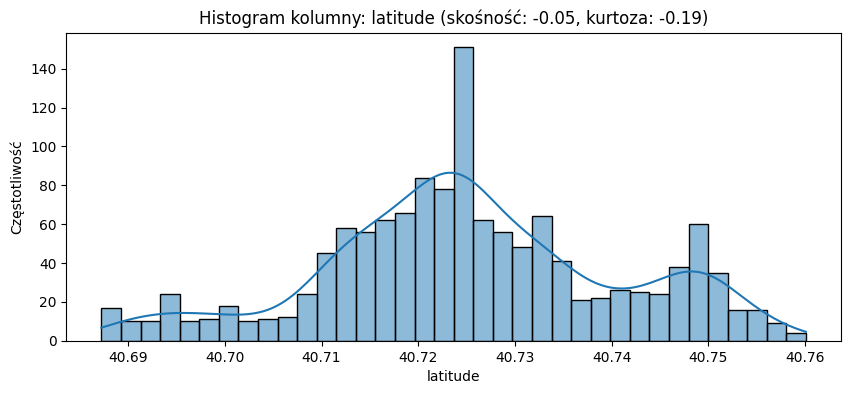

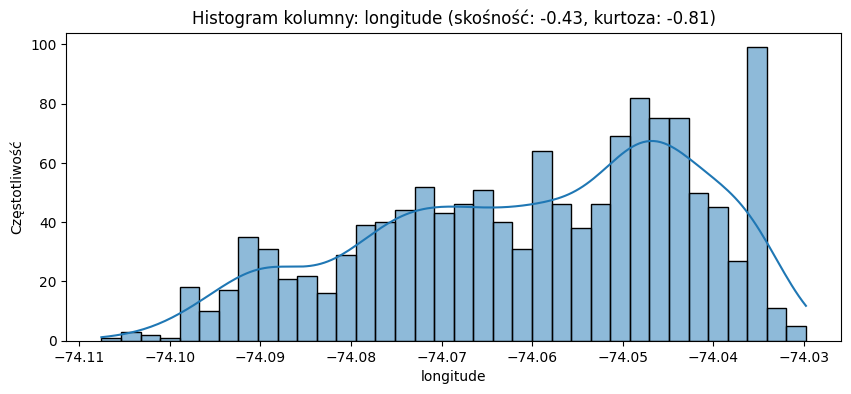

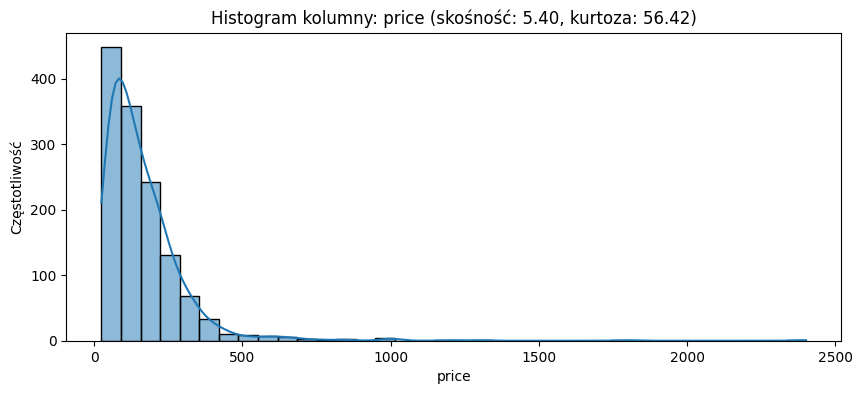

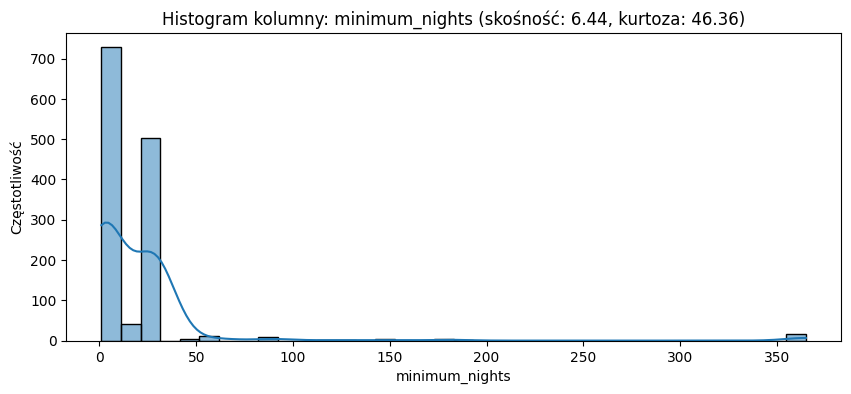

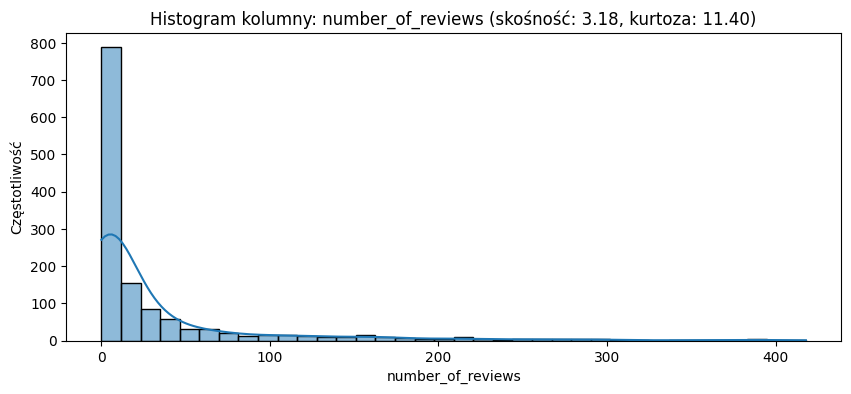

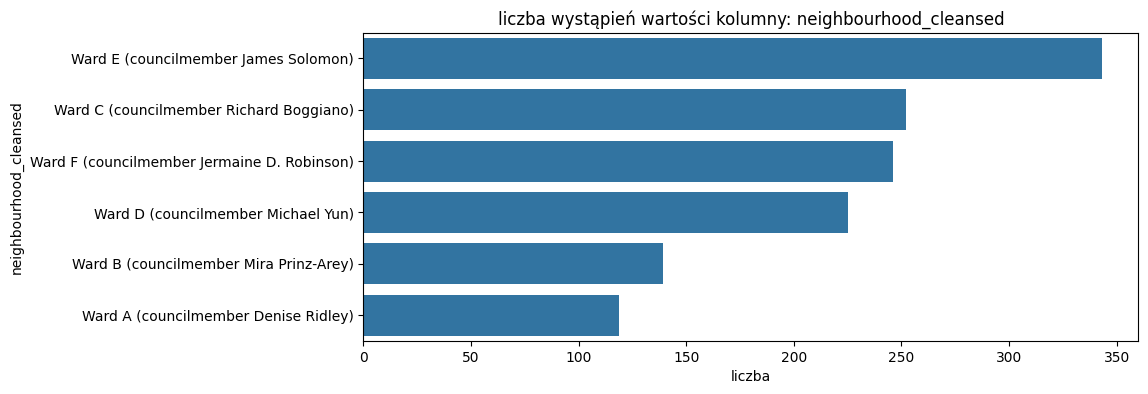

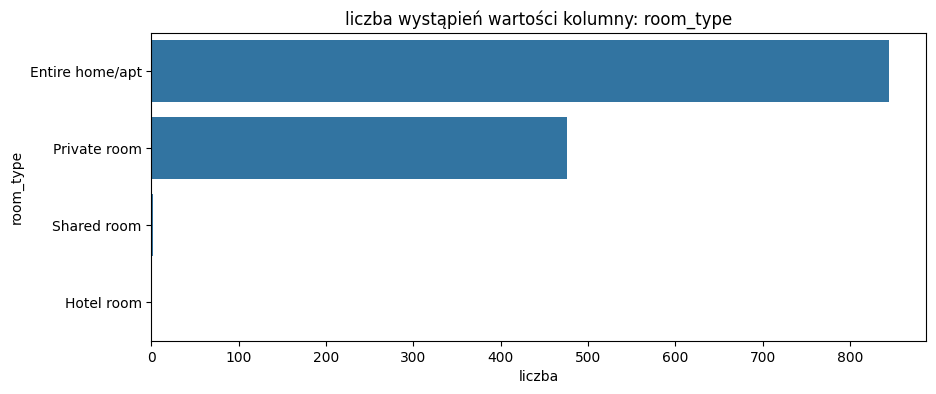

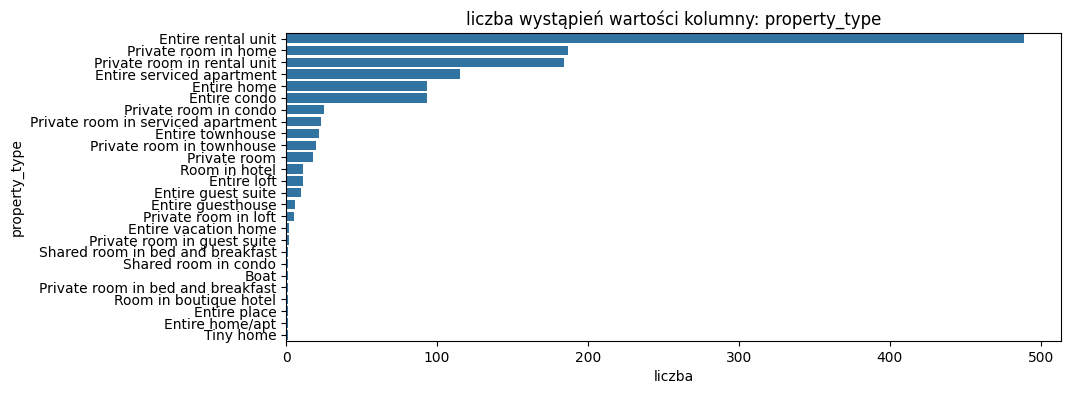

In [295]:
#przykladowe kolumny
numerical_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews']
categorical_columns = ['neighbourhood_cleansed', 'room_type', 'property_type']

num_bins = {col: int(np.sqrt(len(data[col].dropna()))) for col in numerical_columns}

# tworzenie histogramów obliczanie kurtozy i skośności
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column].dropna(), bins=num_bins[column], kde=True)
    plt.title(f'Histogram kolumny: {column} (skośność: {data[column].skew():.2f}, kurtoza: {data[column].kurtosis():.2f})')
    plt.xlabel(column)
    plt.ylabel('Częstotliwość')
    plt.show()
    
# Kategoryczne
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    order = data[column].value_counts().index
    sns.countplot(y=data[column], order=order)
    plt.title(f'liczba wystąpień wartości kolumny: {column}')
    plt.xlabel('liczba')
    plt.ylabel(column)
    plt.show()

# Zadanie 8a

usunięcie kolumn które mają wieksze braki niż 20 procent
uzupełnienie bathrooms z pomocą kolumny bathrooms_text
usunięcie scrape_id ponieważ wszystkie wiersze są identyczne

In [296]:
missing_values_percentage = data.isnull().mean() * 100

columns_to_drop_due_to_missing_values = missing_values_percentage[missing_values_percentage > 20].index.tolist()

columns_to_drop = set(columns_to_drop_due_to_missing_values)
columns_to_drop.discard('bathrooms')
data.drop(columns=columns_to_drop, inplace=True)

data.drop(columns=['scrape_id'], inplace=True)
data['bathrooms'] = data['bathrooms_text'].str.extract(r"(\d*\.?\d+)").astype(float)

'bathrooms' in data.columns, data[['bathrooms', 'bathrooms_text']].head()

(True,
    bathrooms  bathrooms_text
 0        1.0   1 shared bath
 1        1.0          1 bath
 2        1.0          1 bath
 3        1.0          1 bath
 4        1.0  1 private bath)

In [297]:
missing_values_percentage_remaining = data.isnull().mean() * 100
missing_values_percentage_remaining = missing_values_percentage_remaining[missing_values_percentage_remaining > 0]

missing_values_percentage_remaining

description              0.528701
host_response_time       2.492447
host_response_rate       2.492447
host_acceptance_rate     3.927492
host_neighbourhood      15.256798
bathrooms                0.075529
beds                     0.981873
dtype: float64

In [298]:
data['description'].fillna('', inplace=True)

columns_to_drop_due_to_missing_values = missing_values_percentage_remaining[missing_values_percentage_remaining > 20].index.tolist()

data.drop(columns=columns_to_drop_due_to_missing_values, inplace=True)

for column in ['host_response_rate', 'host_acceptance_rate']:
    data[column].fillna(data[column].median(), inplace=True)

In [299]:
data

,id,listing_url,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,email,phone,work_email
0,40669,https://www.airbnb.com/rooms/40669,2023-09-18,city scrape,Condo in Jersey City · ★5.0 · 1 bedroom · 1 be...,<b>The space</b><br />Skyy’s Lounge ....Everyt...,https://a0.muscache.com/pictures/af7e4a45-0118...,175412,https://www.airbnb.com/users/show/175412,Skyy,2010-07-20,within a day,0.71,0.60,False,https://a0.muscache.com/im/users/175412/profil...,https://a0.muscache.com/im/users/175412/profil...,NaN,1,4,True,False,Ward C (councilmember Richard Boggiano),40.737240,-74.053100,Private room in condo,Private room,2,1.0,1 shared bath,1,"[Single level home, Washer, Fire extinguisher,...",128.0,3,365,3,3,365,365,3.0,365.0,True,5,27,57,57,2023-09-18,11,1,1,False,1,0,1,0,1,1,0
1,215768,https://www.airbnb.com/rooms/215768,2023-09-18,city scrape,Home in Jersey City · ★4.77 · 1 bedroom · 2 be...,Walking to distance to Statue of Liberty and E...,https://a0.muscache.com/pictures/miso/Hosting-...,846837,https://www.airbnb.com/users/show/846837,Charlaine,2011-07-20,within an hour,1.00,0.99,True,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,2,4,True,True,Ward F (councilmember Jermaine D. Robinson),40.714380,-74.058100,Entire home,Entire home/apt,4,1.0,1 bath,2,"[Coffee, Washer, Fire extinguisher, Host greet...",139.0,5,1000,5,5,1000,1000,5.0,1000.0,True,6,19,35,285,2023-09-18,171,17,2,False,2,2,0,0,1,1,0
2,254245,https://www.airbnb.com/rooms/254245,2023-09-18,city scrape,Home in Jersey City · ★4.76 · 1 bedroom · 1 be...,Walking to distance to Statue of Liberty and E...,https://a0.muscache.com/pictures/miso/Hosting-...,846837,https://www.airbnb.com/users/show/846837,Charlaine,2011-07-20,within an hour,1.00,0.99,True,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,2,4,True,True,Ward F (councilmember Jermaine D. Robinson),40.711620,-74.061790,Entire home,Entire home/apt,2,1.0,1 bath,1,"[Coffee, Washer, Fire extinguisher, Host greet...",139.0,5,365,5,5,365,365,5.0,365.0,True,0,18,41,303,2023-09-18,126,8,0,False,2,2,0,0,1,1,0
3,269266,https://www.airbnb.com/rooms/269266,2023-09-18,city scrape,Rental unit in Jersey City · ★4.36 · 2 bedroom...,Enjoy that private luxury two bedrooms apartme...,https://a0.muscache.com/pictures/miso/Hosting-...,1410590,https://www.airbnb.com/users/show/1410590,Magda,2011-11-15,within an hour,1.00,1.00,False,https://a0.muscache.com/im/users/1410590/profi...,https://a0.muscache.com/im/users/1410590/profi...,Bergen-Lafayette,11,18,True,False,Ward F (councilmember Jermaine D. Robinson),40.711350,-74.063740,Entire rental unit,Entire home/apt,5,1.0,1 bath,3,"[Self check-in, Pack ’n play/Travel crib, Fire...",136.0,3,365,2,3,1125,1125,3.0,1125.0,True,5,17,42,314,2023-09-18,418,18,2,True,11,1,10,0,1,1,0
4,270245,https://www.airbnb.com/rooms/270245,2023-09-18,city scrape,Townhouse in Jersey City · ★4.55 · 1 bedroom ·...,Just for you small bedroom with private bathro...,https://a0.muscache.com/pictures/miso/Hosting-...,1410590,https://www.

In [300]:
missing_values_percentage_remaining = data.isnull().mean() * 100
missing_values_percentage_remaining = missing_values_percentage_remaining[missing_values_percentage_remaining > 0]
missing_values_percentage_remaining

host_response_time     2.492447
host_neighbourhood    15.256798
bathrooms              0.075529
beds                   0.981873
dtype: float64

Uzupełnianie danych
medianą w przypadku nuymerycznych i modą w kategorycznych

In [301]:
data['host_response_time'].fillna(data['host_response_time'].mode()[0], inplace=True)
data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
data['beds'].fillna(data['beds'].median(), inplace=True)
data['host_neighbourhood'].fillna(data['host_neighbourhood'].mode()[0], inplace=True)
missing_values_final_check = data.isnull().sum().max()
missing_values_final_check

0

In [302]:
missing_values_percentage_remaining = data.isnull().mean() * 100
missing_values_percentage_remaining = missing_values_percentage_remaining[missing_values_percentage_remaining > 0]
missing_values_percentage_remaining

Series([], dtype: float64)

In [303]:
# Zadanie 8b

wykresu punktowe

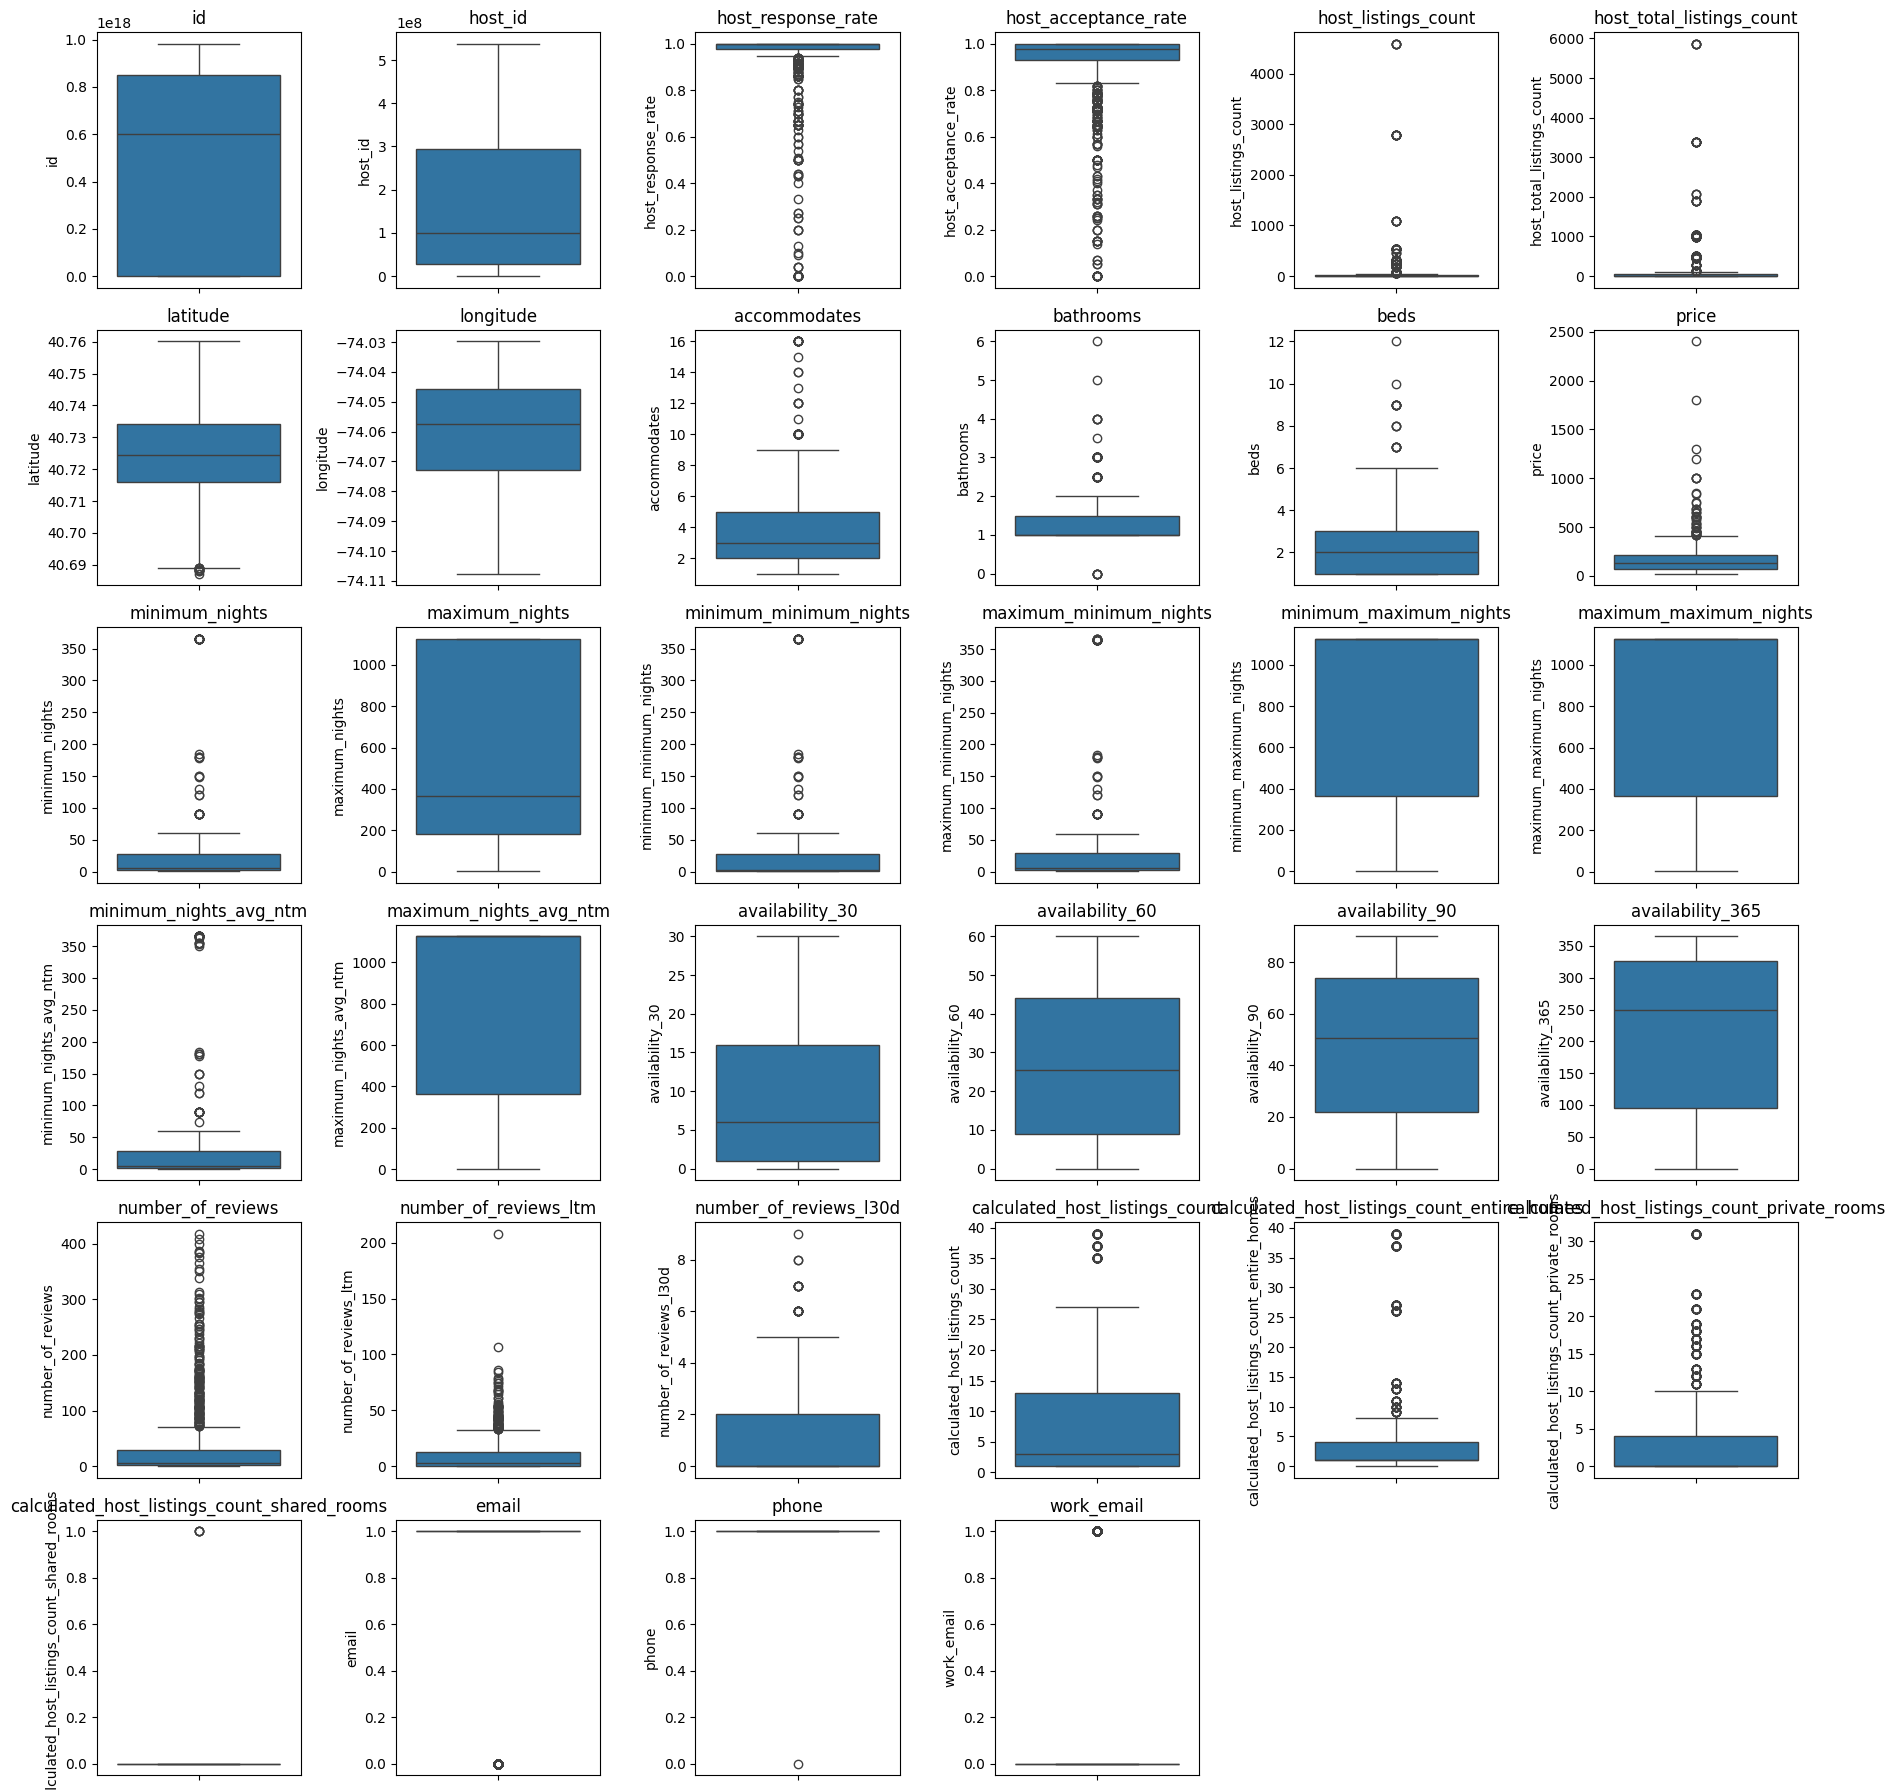

In [304]:
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

num_numerical_columns = len(numerical_columns)

num_rows = (num_numerical_columns - 1) // 6 + 1

plt.figure(figsize=(18, 3 * num_rows))  
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 6, i)  
    sns.boxplot(data=data, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

przycięcie wartości odstających

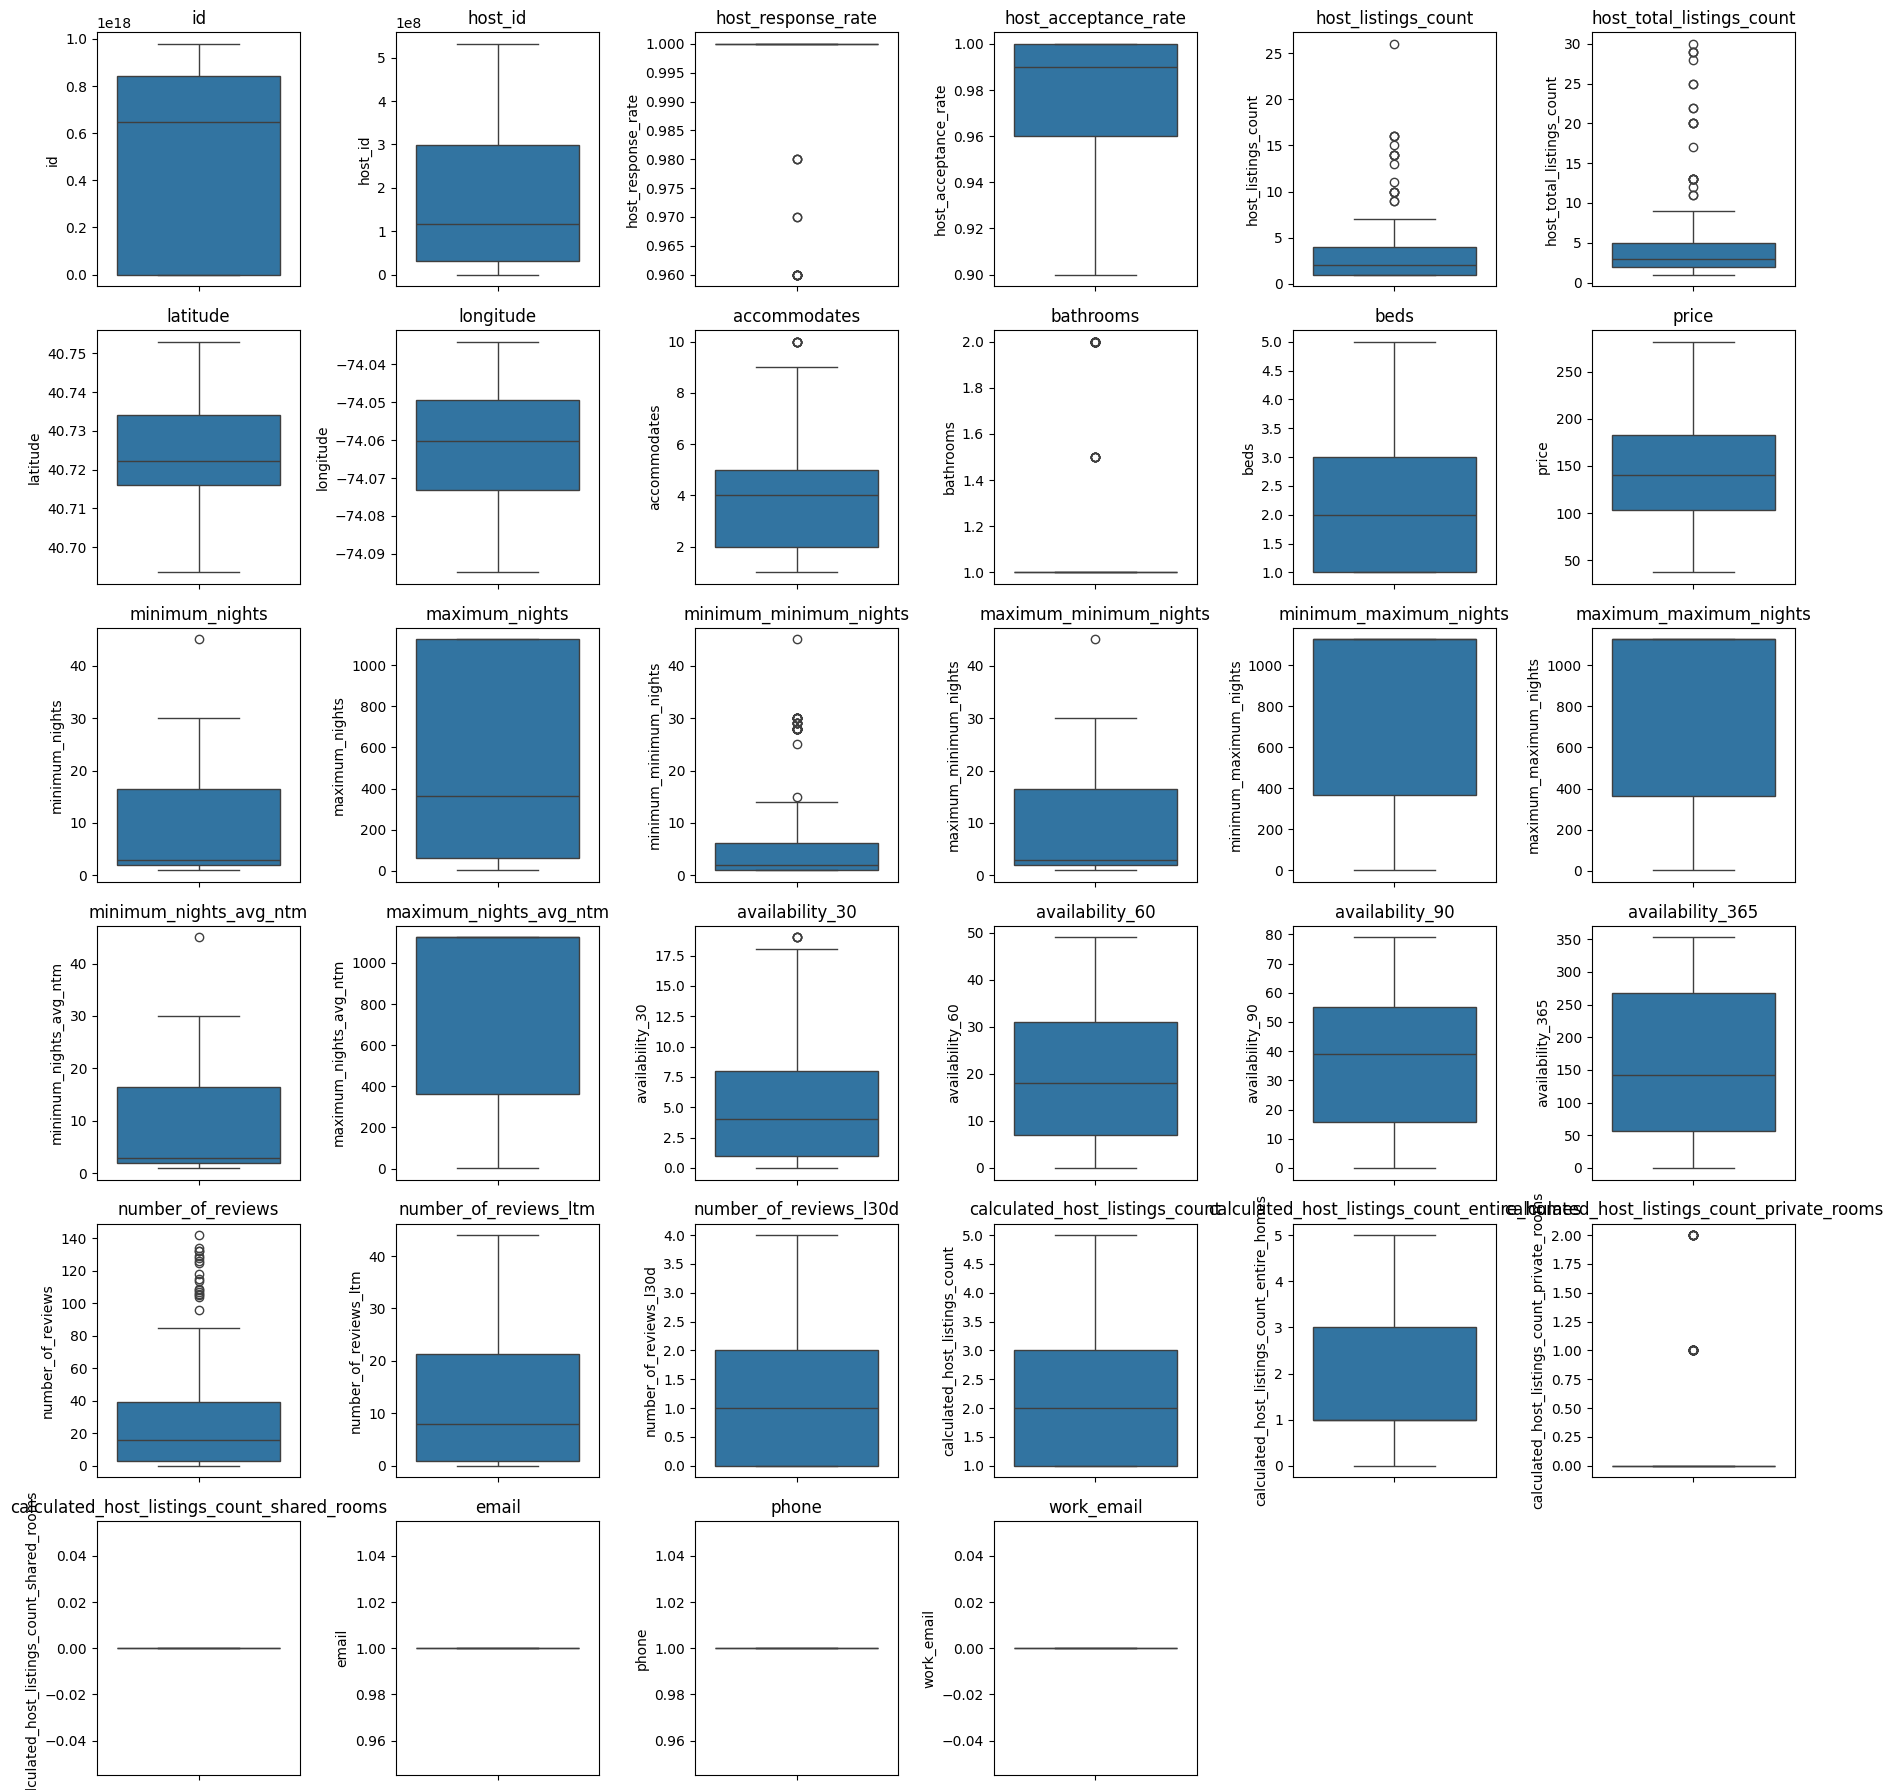

In [305]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 1 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numerical_columns:
    data = remove_outliers(data, column)


plt.figure(figsize=(18, 3 * num_rows))  
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 6, i)  
    sns.boxplot(data=data, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

Po zastosowaniu metody opartej na IQR do przycięcia wartości odstających, ponownie wygenerowałem wykresy pudełkowe. Możemy zobaczyć, że teraz wartości rozkładają się bardziej równomiernie i wartości skrajne zostały usunięte.

Normalizacja danych

In [306]:
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(data[numerical_columns]), columns=numerical_columns)
df_normalized.head()

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,email,phone,work_email
0,-1.135024,-1.069582,0.269171,0.464416,-0.380840,-0.158848,-0.934302,0.017971,-0.874616,-0.436439,-0.974943,-0.133053,-0.366376,-0.208833,-0.242618,-0.384471,-0.834198,-0.868674,-0.375877,-0.859822,-1.077132,-0.061544,0.239002,1.247158,2.787751,-0.356774,-0.948026,-0.008418,0.157237,-0.434727,0.0,0.0,0.0,0.0
1,-1.135024,-1.072816,0.269171,0.114318,-0.655269,-0.653043,-0.091456,0.843117,0.032393,-0.436439,-0.974943,1.248817,-0.712031,-0.857972,-0.613404,-0.384471,0.850027,0.833300,-0.410755,0.847335,1.019371,0.877465,1.110523,-0.892658,-0.133404,0.897533,0.568815,-0.833405,-0.559472,-0.434727,0.0,0.0,0.0,0.0
2,-1.135024,-1.004090,0.269171,-1.286075,-0.655269,-0.653043,0.046345,1.123134,-0.874616,2.463290,-0.974943,-1.089732,-0.712031,-1.037370,-0.613404,-0.732939,0.850027,0.833300,-0.724660,0.847335,-0.867482,-1.217248,-1.155433,-1.131397,0.525288,0.897533,0.568815,-0.833405,-1.276181,1.458750,0.0,0.0,0.0,0.0
3,-1.135024,-0.752872,0.269171,-0.935977,-0.380840,-0.488311,1.852069,0.941333,-1.328120,1.013426,-0.974943,-1.355476,-0.712031,-0.999602,-0.613404,-0.732939,0.850027,0.833300,-0.724660,0.847335,-0.657832,-1.217248,-1.460466,-1.414348,-0.820735,-0.983927,-0.948026,-0.008418,-1.276181,3.352227,0.0,0.0,0.0,0.0
4,-1.135024,-0.654701,0.269171,-0.235780,-0.380840,-0.488311,0.315385,-0.744300,0.939402,1.013426,0.819319,-0.133053,-0.452790,1.585152,-0.335315,-0.471588,0.850027,0.833300,-0.463072,0.847335,-1.077132,-1.361711,-1.547618,-1.387822,0.210261,-0.199985,-0.189605,-0.833405,-0.559472,-0.434727,0.0,0.0,0.0,0.0


# Zadanie 9
Macierz korelacji

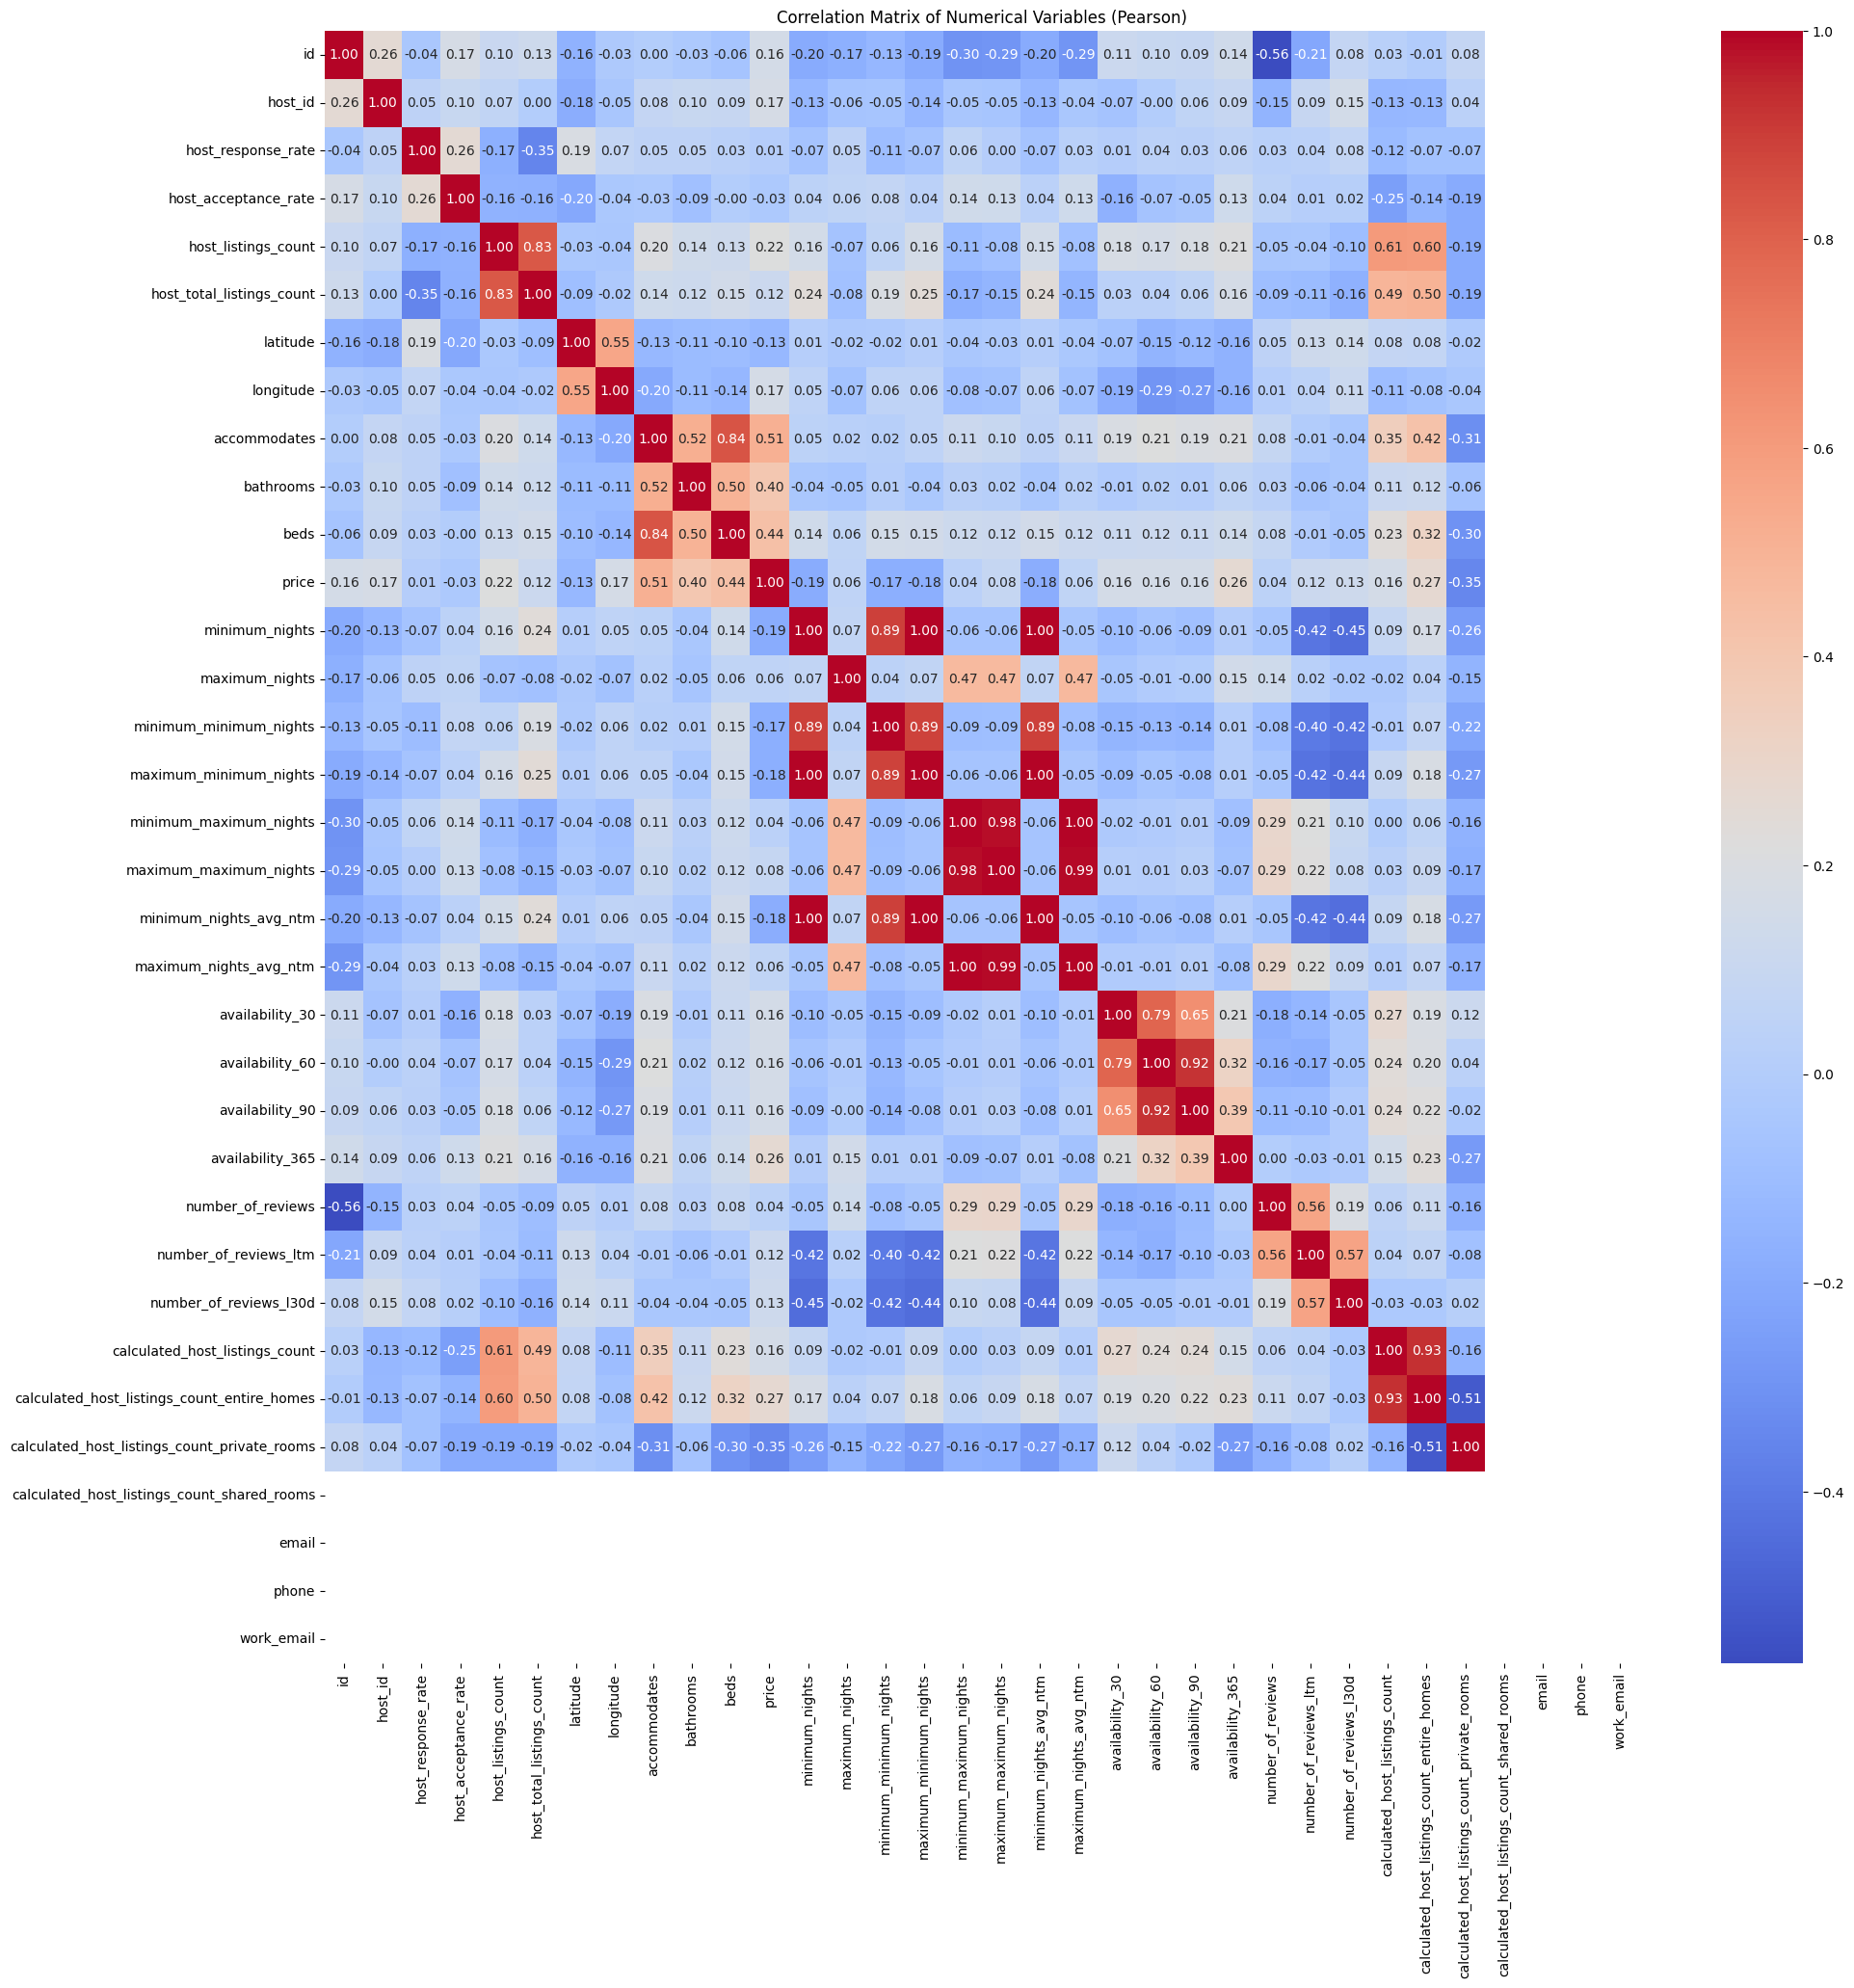

In [307]:

correlation_matrix = data.select_dtypes(include=['number']).corr(method='pearson')

plt.figure(figsize=(22, 22))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables (Pearson)')
plt.show()


Wykresy punktwe dla par mających dużą korelacje (założyłem >0.7 <-0.7 przy mniejszych wqartościach nie starcza mi ramu :) )

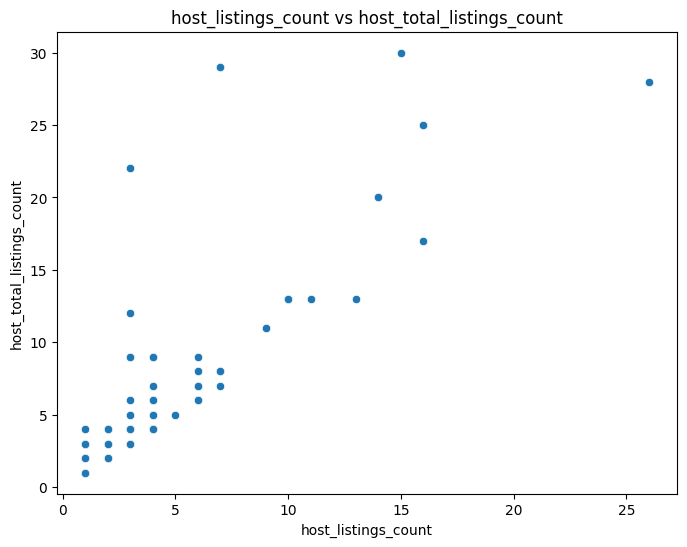

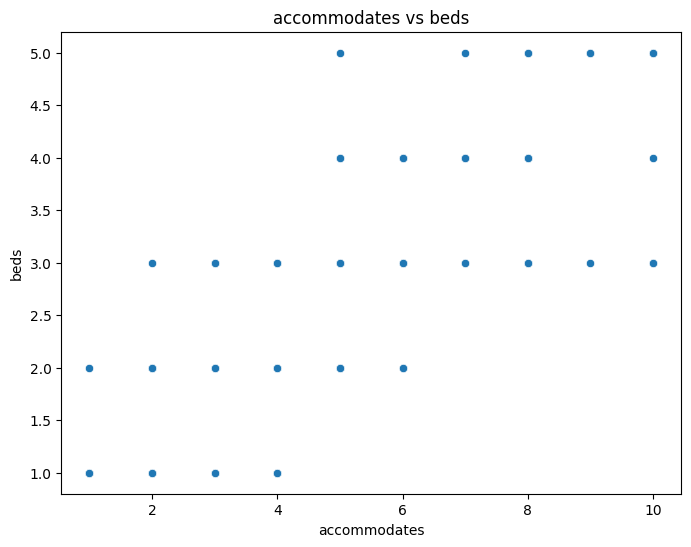

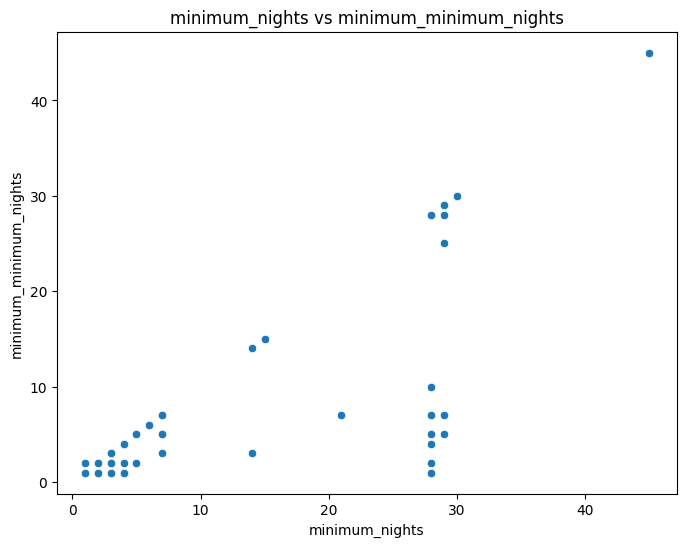

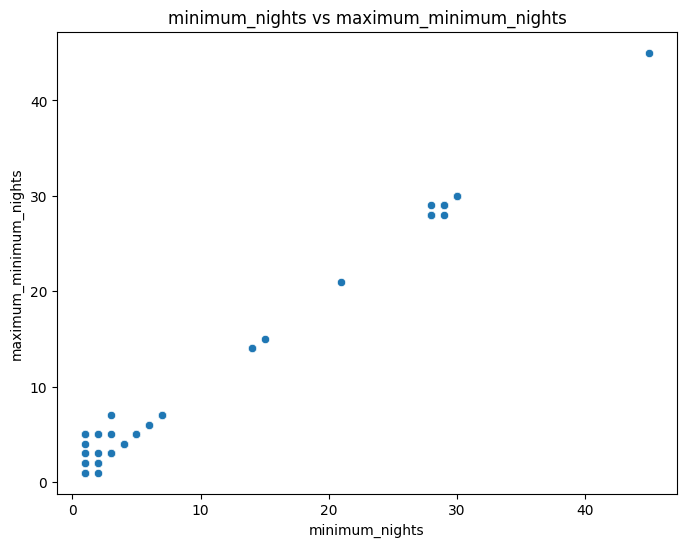

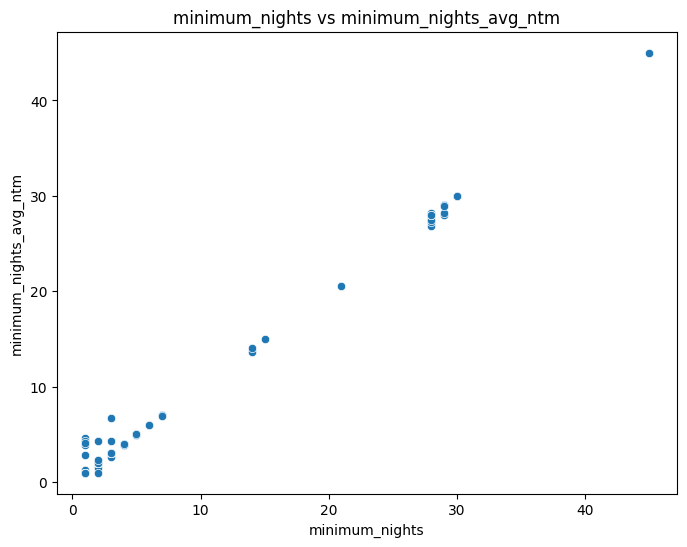

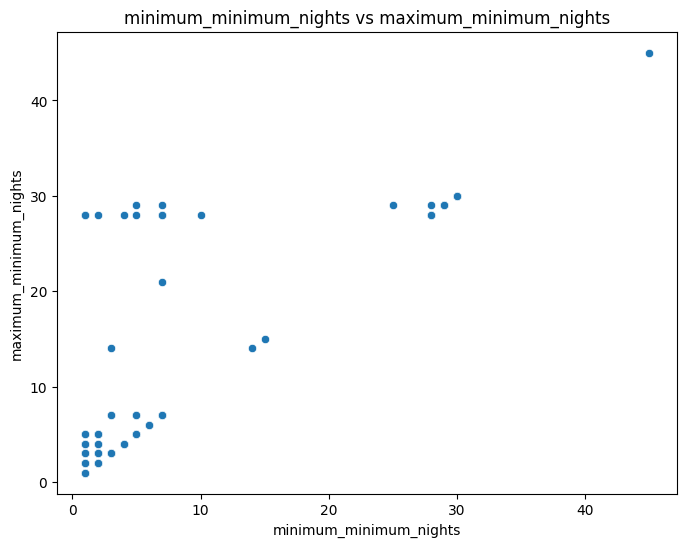

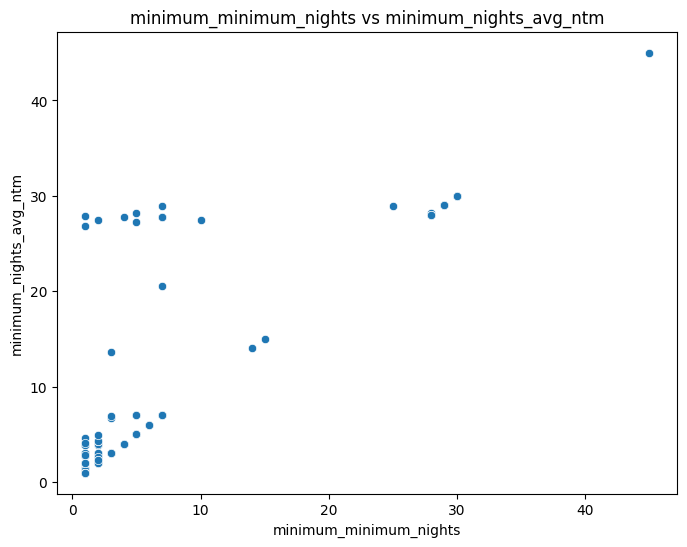

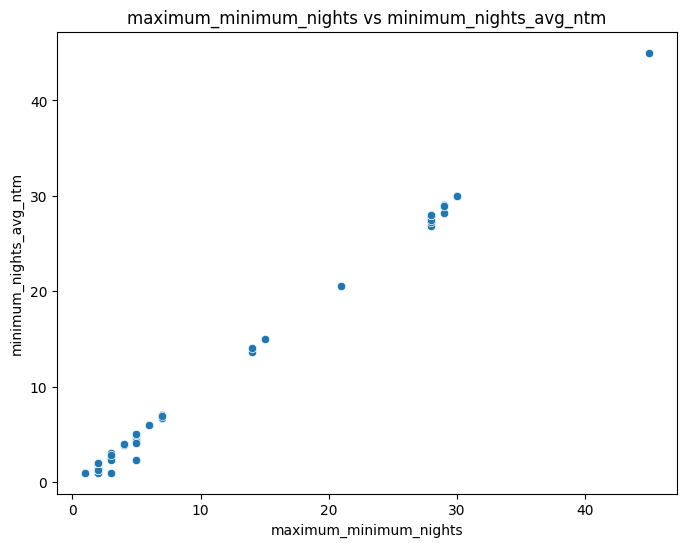

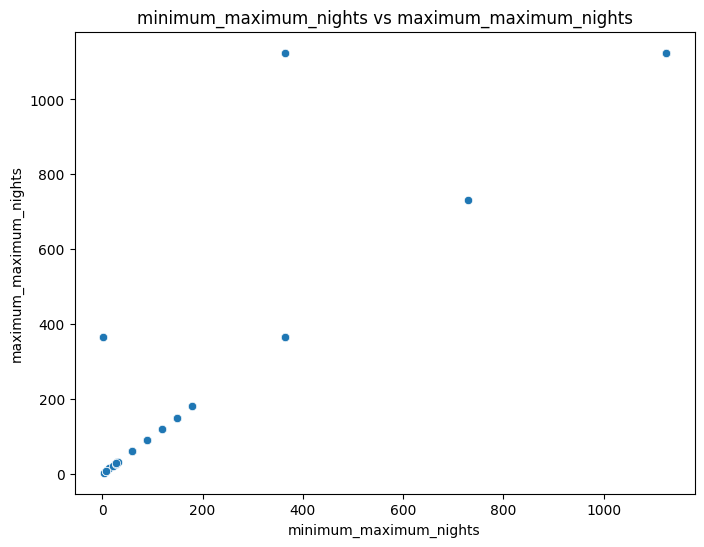

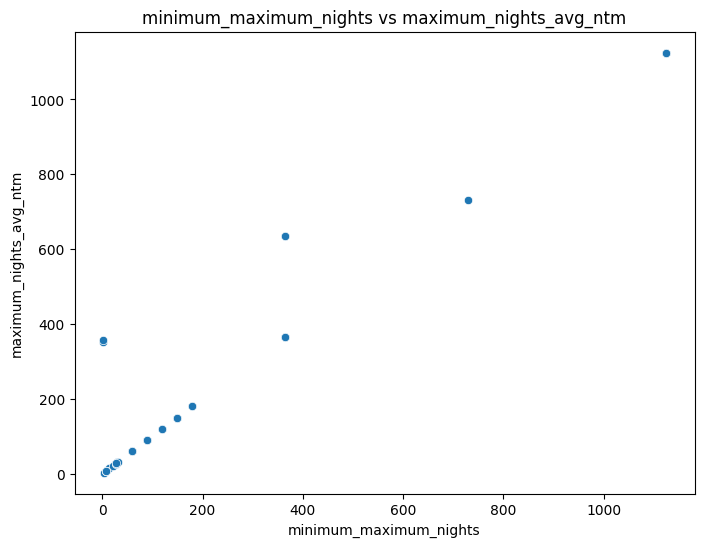

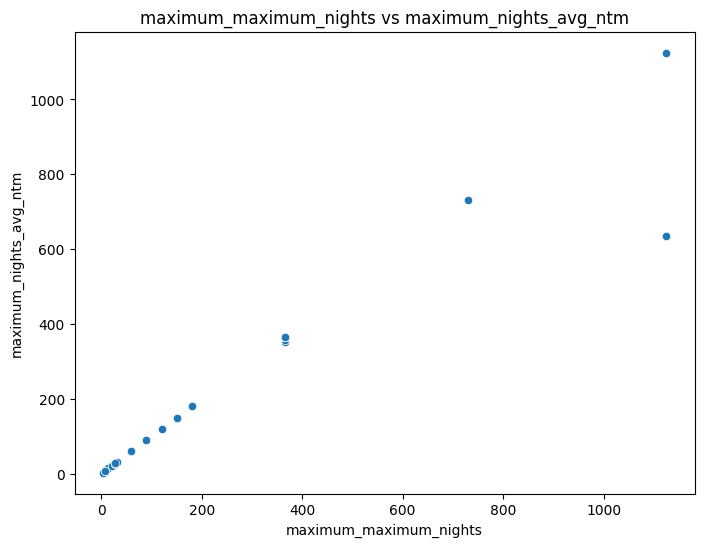

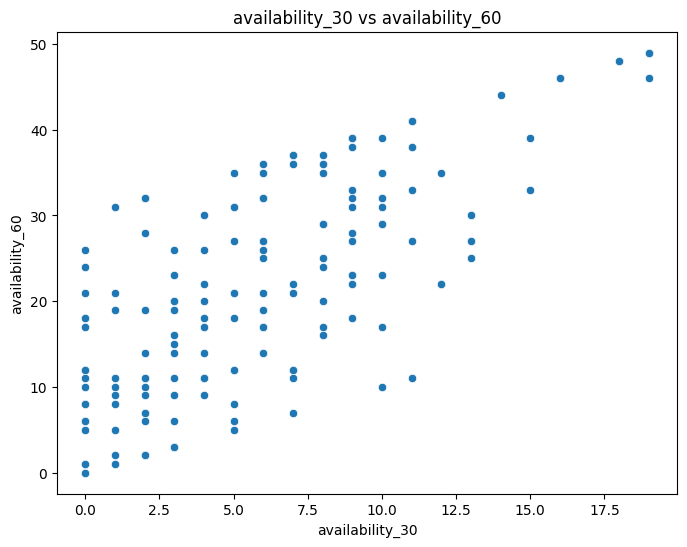

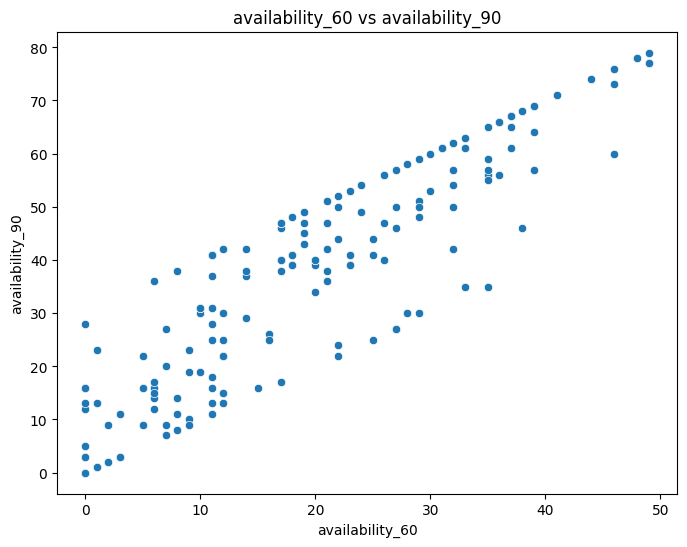

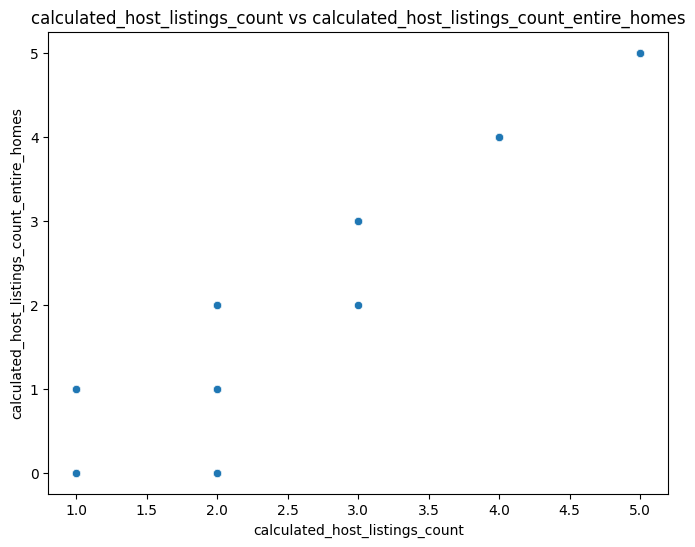

In [308]:

high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs['Correlation'] > 0.7) | (high_corr_pairs['Correlation'] < -0.7)
]

high_corr_pairs = high_corr_pairs[
    high_corr_pairs['Variable 1'] != high_corr_pairs['Variable 2']
].drop_duplicates(subset='Correlation')


scatter_plot_code = ""
for index, row in high_corr_pairs.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    corr_value = row['Correlation']
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=var1, y=var2)
    plt.title(var1 + ' vs ' + var2)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()


In [309]:
from sklearn.linear_model import LinearRegression


def calculate_r2_for_categorical(df, num_col, cat_col):
    one_hot_encoded = pd.get_dummies(df[cat_col])
    reg = LinearRegression()
    reg.fit(one_hot_encoded, df[num_col])
    return reg.score(one_hot_encoded, df[num_col])

unique_values_per_categorical_col = {col: data[col].nunique() for col in categorical_columns}

selected_categorical_columns = [col for col, count in unique_values_per_categorical_col.items() if count < 10]
r2_adjusted_results = {}

for num_col in numerical_columns:
    for cat_col in selected_categorical_columns:
        r2_val = calculate_r2_for_categorical(data, num_col, cat_col)
        r2_adjusted_results[(cat_col, num_col)] = r2_val

sorted_adjusted_r2_results = sorted(r2_adjusted_results.items(), key=lambda item: item[1], reverse=True)


sorted_adjusted_r2_results[:20]  

[(('neighbourhood_cleansed', 'calculated_host_listings_count_shared_rooms'),
  1.0),
 (('room_type', 'calculated_host_listings_count_shared_rooms'), 1.0),
 (('neighbourhood_cleansed', 'email'), 1.0),
 (('room_type', 'email'), 1.0),
 (('neighbourhood_cleansed', 'phone'), 1.0),
 (('room_type', 'phone'), 1.0),
 (('neighbourhood_cleansed', 'work_email'), 1.0),
 (('room_type', 'work_email'), 1.0),
 (('neighbourhood_cleansed', 'latitude'), 0.8906375690018828),
 (('room_type', 'calculated_host_listings_count_private_rooms'),
  0.8203606840944491),
 (('neighbourhood_cleansed', 'longitude'), 0.8200674269077721),
 (('room_type', 'calculated_host_listings_count_entire_homes'),
  0.2958283980932933),
 (('room_type', 'price'), 0.13535416866836736),
 (('neighbourhood_cleansed', 'calculated_host_listings_count_entire_homes'),
  0.1032739588504269),
 (('room_type', 'accommodates'), 0.09836945828961152),
 (('neighbourhood_cleansed', 'availability_60'), 0.09712446905674599),
 (('neighbourhood_cleansed',

Wyświetelnie 3 przykładowych wysokich zależności między zmiennymi 

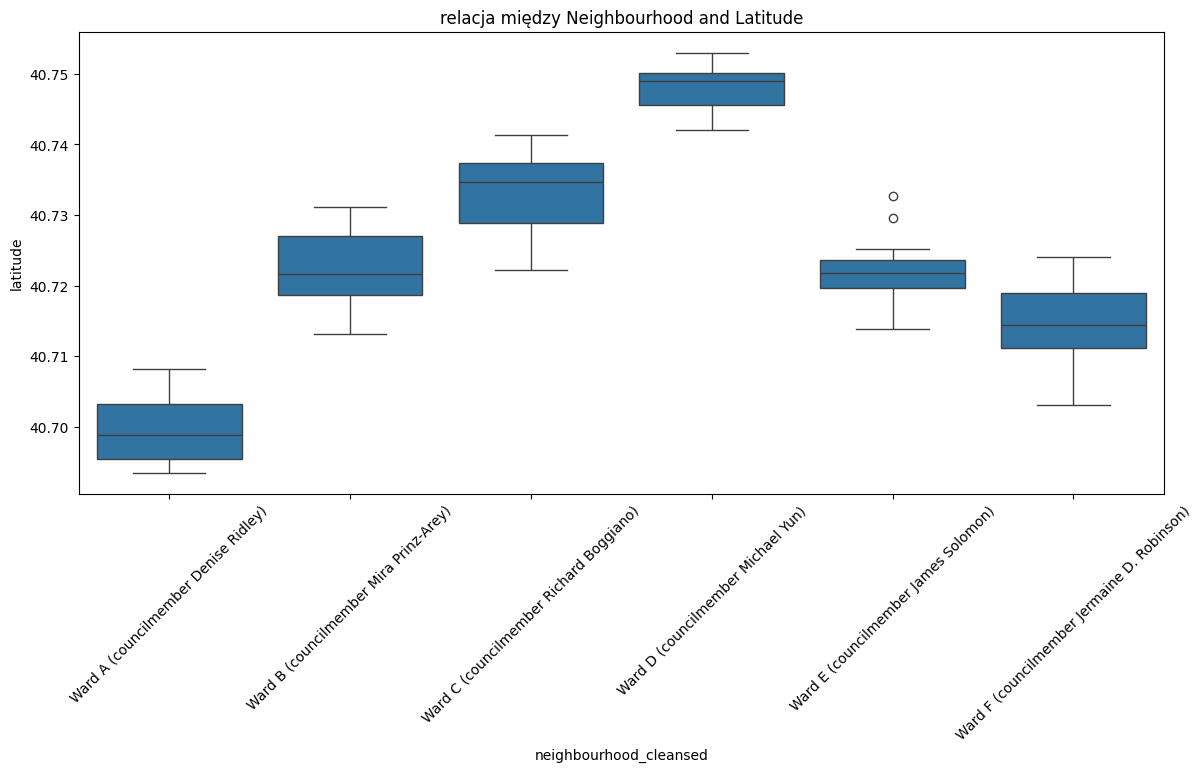

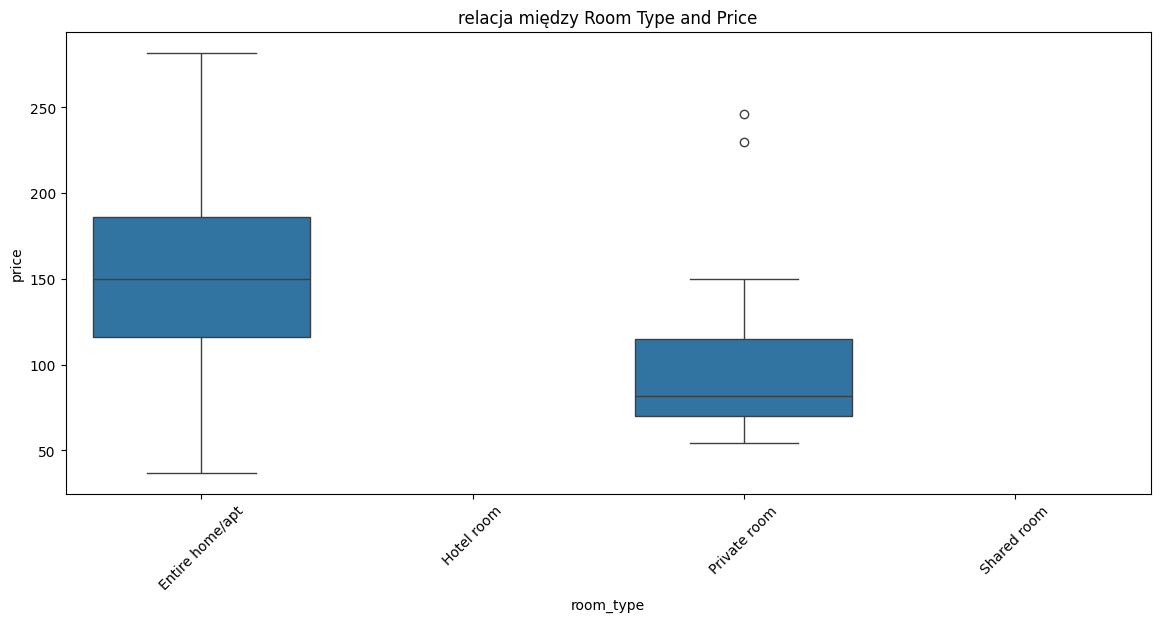

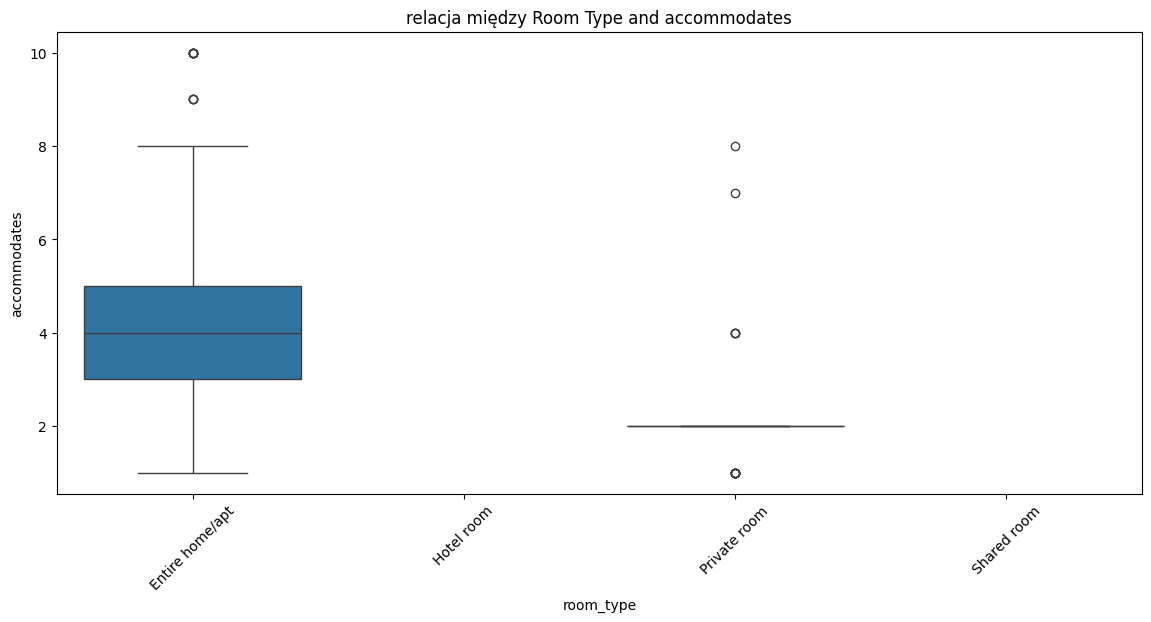

In [310]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='neighbourhood_cleansed', y='latitude')
plt.title('relacja między Neighbourhood and Latitude')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='room_type', y='price')
plt.title('relacja między Room Type and Price')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='room_type', y='accommodates')
plt.title('relacja między Room Type and accommodates')
plt.xticks(rotation=45)
plt.show()